## Master IASD
# Deep Learning for Image Analisis

# Practical Session

In this practical work we study different techniques for unsupervised generation using linear approaches as well as Autoencoders.

HOMEWORK: You should analyse the result of this notebook for only one class of Fashion-Mnist or CIFAR (according to your computational power).


Santiago VELASCO-FORERO

Email: Santiago.Velasco@mines-paristech.fr

Subject: Practical Session DLIA lastname name

Deadline: Nov 5 / 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [4]:
import sklearn.metrics
import sys


def mmd(x, y,scale=1000):
    """ Maximum Mean Discrepancy (MMD)"""
    """" Using Gaussian Kernel """
    """ [1] Arthur Gretton, Karsten M Borgwardt, Malte J Rasch, Bernhard Schölkopf, and Alexander Smola. A kernel two-sample test. Journal of Machine Learning Research, 13(Mar):723–773, 2012. """
    """ [2] Gintare Karolina Dziugaite, Daniel M Roy, and Zoubin Ghahramani. Training generative neural networks via maximum mean discrepancy optimization. arXiv preprint arXiv:1505.03906, 2015. """

    def gaussian_kernel(a, b, sigma=10.0):
        dist = np.sum((a[:, np.newaxis] - b[np.newaxis, :]) ** 2, axis=2)
        gamma = (2 * sigma ** 2)
        return np.exp(-dist / gamma)

    Kxx = gaussian_kernel(x, x)
    Kyy = gaussian_kernel(y, y)
    Kxy = gaussian_kernel(x, y)

    mmd_value = np.mean(Kxx) + np.mean(Kyy) - 2 * np.mean(Kxy)
    return scale*mmd_value



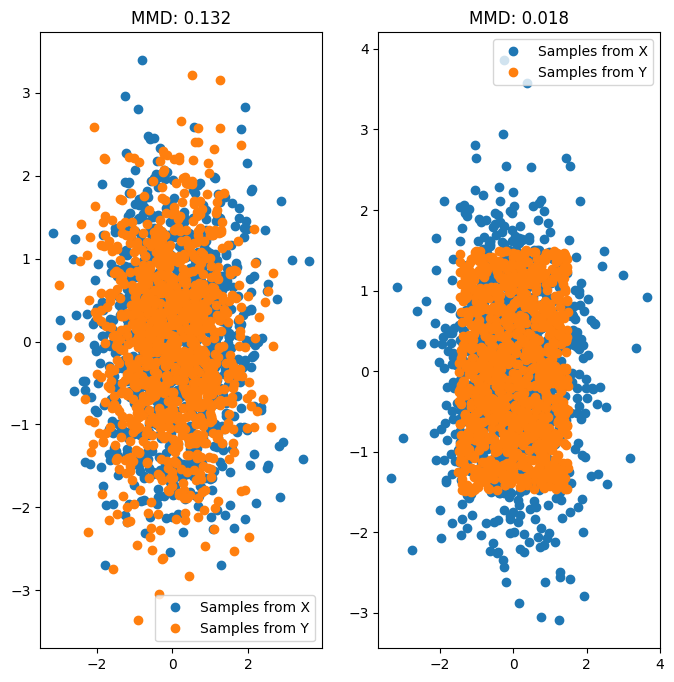

In [5]:
# Example usage Maximum Mean Discrepancy

N=1000
D=2
x = np.random.randn(N, D)
y = np.random.randn(N, D)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(x[:,0],x[:,1],'o',label='Samples from X')
plt.plot(y[:,0],y[:,1],'o',label='Samples from Y')
plt.title('MMD: '+str(np.round(mmd(x, y),3)))
plt.legend()

plt.subplot(1,2,2)
x = np.random.randn(N, D)
y = 3*(np.random.rand(N, D)-.5)
plt.plot(x[:,0],x[:,1],'o',label='Samples from X')
plt.plot(y[:,0],y[:,1],'o',label='Samples from Y')
plt.title('MMD: '+str(np.round(mmd(x, y),3)))
plt.legend()
plt.show()



##  Q1. Understanding (Maximum Mean Discrepancy).

A. For two samples of size 500 from a Gaussian distribution (0,1) calculate the value of MMD, varying the dimension from 2 to 50. Make a plot of MMD vs dimension by doing 10 repetitions of the experiment.
 What do you observe and what can you conclude from this experiment?

B. Repeat the same experiment for samples from the uniform distribution (0,1). What do you observe? What can you conclude from this experiment, with respect to A?

C. Now compare samples from the Gaussian distribution (0,1) with one from a Gaussian distribution (.1,1). Is the MMD able to detect the difference between the distributions? What can you conclude from this experiment?

D. Set a dimension according to 2 times your birth day, (my is January 14, so my dimension would be 28) and perform experiment A (same distribution) and C (different distribution) by changing N between 5 and 500 with a step of 10. What do you observe? Since what value of N the MMD is able to find that the samples are of different distribution, and if you should recommend a threshold value, what would it be?

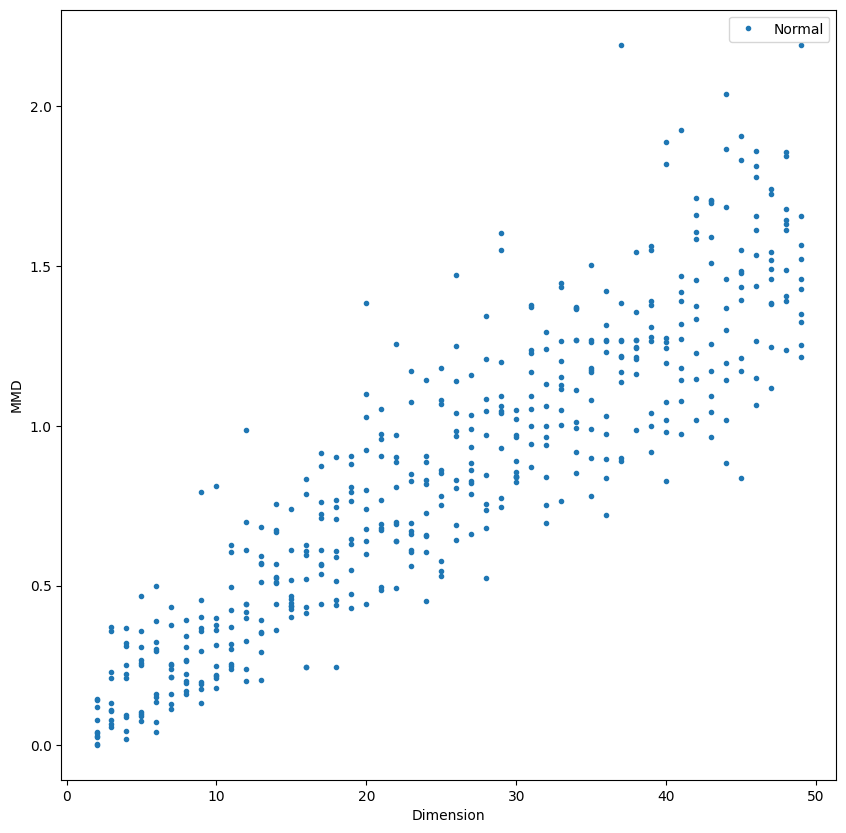

In [6]:
#Answer to question 1
N=500
resNormal=[]
Dplot=[]
for rep in range(10):
    for D in range(2,50):
        x = np.random.randn(N, D)
        y = np.random.randn(N, D)
        resNormal.append([mmd(x, y)])
        Dplot.append(D)
plt.figure(figsize=(10,10))
plt.plot(Dplot,resNormal,'.')
plt.legend(['Normal'])
plt.xlabel('Dimension')
plt.ylabel('MMD')
plt.show()

We observe that both the mean and variance of the Maximum Mean Discrepancy (MMD) increase with the number of dimensions. Nevertheless, the MMD remains relatively low, indicating that it effectively detects similarity between the two distributions, even in high-dimensional spaces where samples tend to be farther apart. This suggests that the MMD is robust and effective in high-dimensional settings.

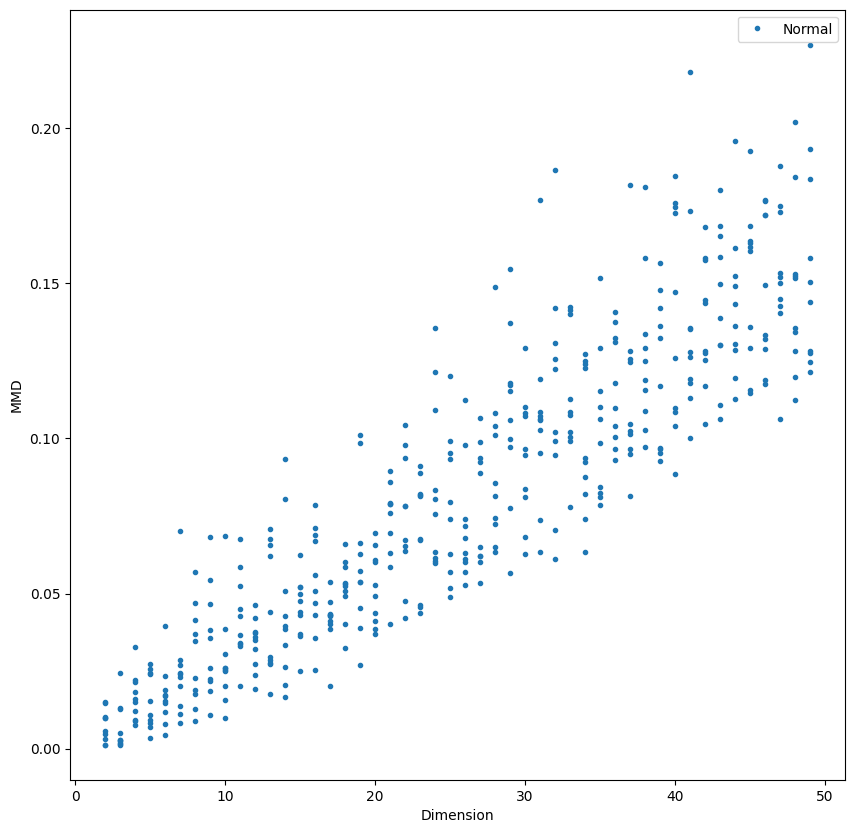

In [7]:
#Answer to question B
N=500
resNormal=[]
Dplot=[]
for rep in range(10):
    for D in range(2,50):
        x = np.random.uniform(0,1,(N,D))
        y = np.random.uniform(0,1,(N, D))
        resNormal.append([mmd(x, y)])
        Dplot.append(D)
plt.figure(figsize=(10,10))
plt.plot(Dplot,resNormal,'.')
plt.legend(['Normal'])
plt.xlabel('Dimension')
plt.ylabel('MMD')
plt.show()

The mean and variance of the MMD increase more slowly with the number of dimensions for two uniform distributions. This behavior can partly be attributed to the bounded nature of uniform distributions, which makes the samples used for the MMD less affected by the curse of dimensionality. It implies that mmd is more effective for bounded distributions



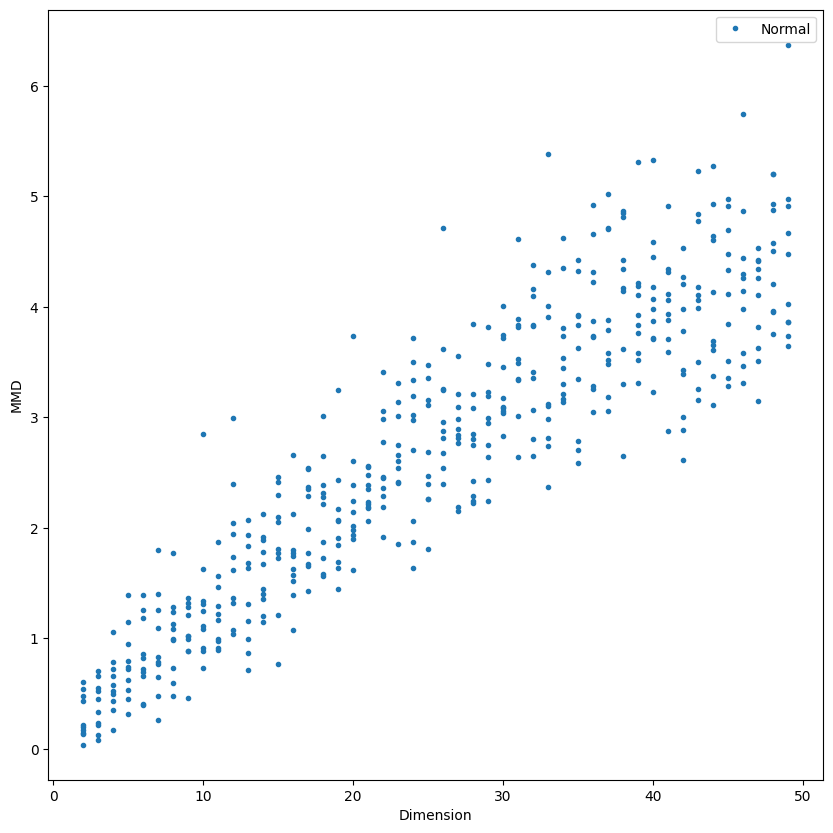

In [8]:
#Answer to question C
N=500
resNormal=[]
Dplot=[]
for rep in range(10):
    for D in range(2,50):
        x = np.random.randn(N, D)
        y = np.random.randn(N, D) +0.1
        resNormal.append([mmd(x, y)])
        Dplot.append(D)
plt.figure(figsize=(10,10))
plt.plot(Dplot,resNormal,'.')
plt.legend(['Normal'])
plt.xlabel('Dimension')
plt.ylabel('MMD')
plt.show()

For the two unequal Gaussian distributions, the mean and variance of the MMD increase significantly with the number of dimensions. The MMD appears to capture the difference between the two Gaussians effectively, as it is consistently higher compared to the MMD for two similar distributions across all dimensions. This demonstrates that the MMD is effective at determining whether two distributions are similar or not. However, it requires a reference point, or "landmark," for comparison. Specifically, we observe that the value of the MMD for two similar distributions can vary greatly depending on whether the distributions are Gaussian, uniform, or another type.

To use the MMD for determining whether two distributions are equal, a landmark value
K must be established. This landmark represents the MMD value for a "ground truth" distribution compared to itself. Once this reference value is set, the MMD can be reliably used to compare other distributions and assess their similarity.

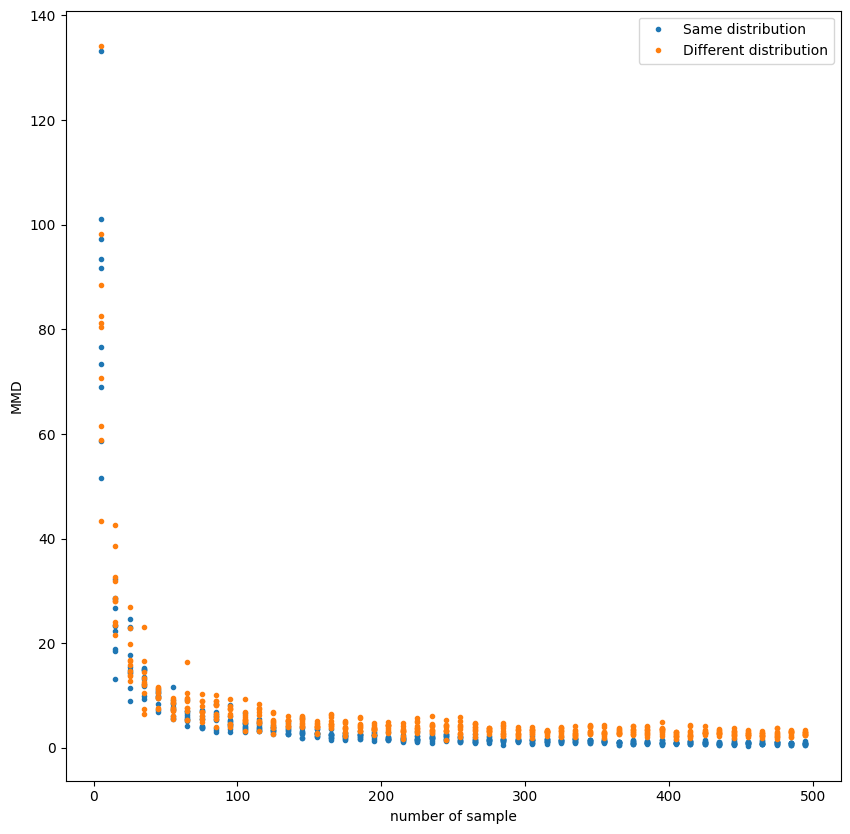

In [9]:
#Answer to question D
D = 24
resNormal=[]
resNormal2 = []
Dplot=[]
for rep in range(10):
    for N in range(5,500,10):
        x = np.random.randn(N, D)
        y = np.random.randn(N, D)
        z = np.random.randn(N, D) +0.1
        resNormal.append([mmd(x, y)])
        resNormal2.append([mmd(x, z)])
        Dplot.append(N)
plt.figure(figsize=(10,10))
plt.plot(Dplot,resNormal,'.', label='Same distribution')
plt.plot(Dplot,resNormal2,'.', label='Different distribution')
plt.legend()
plt.xlabel('number of sample')
plt.ylabel('MMD')
plt.show()

We observe that for both MMD calculations, the values converge to small, distinct values
K and
K'
  as the number of samples increases. The convergence begins to stabilize after approximately 100 samples, and by 200 samples, the two MMD values are clearly separated. The MMD for the same distribution converges to a value below 5, whereas the MMD for the different distributions converges to a value above 5. Based on this observation, we can set the threshold value
t=5 to distinguish between similar and different distributions.

In [10]:
print(np.mean(resNormal))
print(np.mean(resNormal2))

4.923291804111194
6.612952815477772


##  Q2. Understanding MMD.
Suppose you want to train a generative model for MNIST. Use the class number 9 and class 7 to determine how many samples are needed to use an MMD as a good criterion to determine if a generation method is good.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


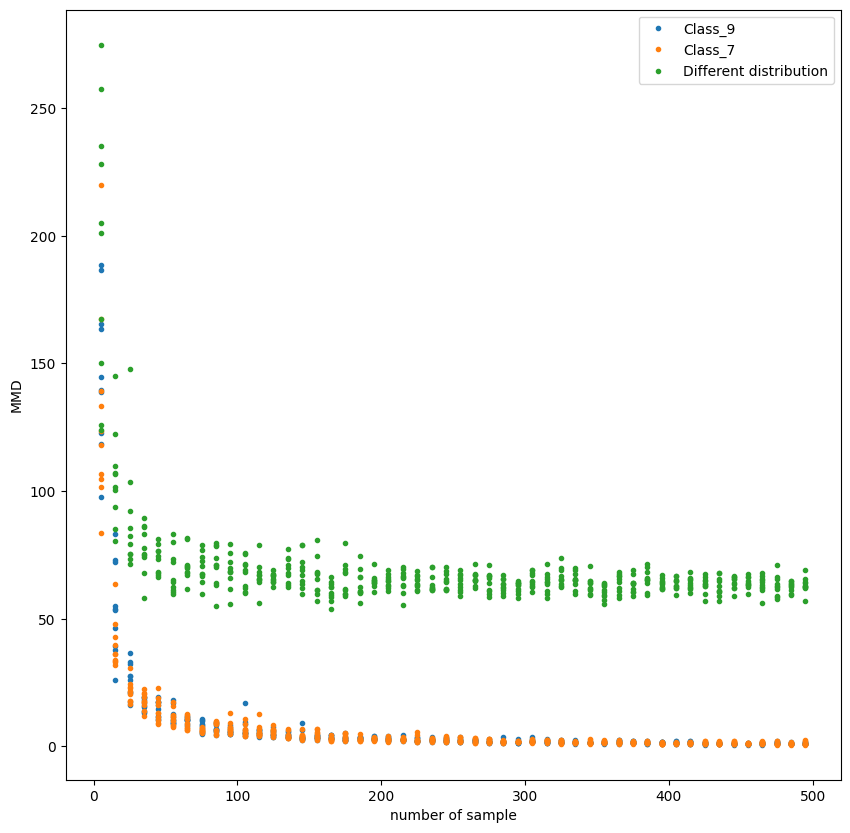

In [11]:
(X, Y), (XTEST, YTEST) = keras.datasets.mnist.load_data()
X=X/255.

def get_random_samples(X,nsamples):
    N = X.shape[0]
    D = X.shape[1]*X.shape[2]
    X = X.reshape(N,D)
    idx = random.sample(range(N),nsamples)
    return X[idx,:]

#Include your answer here
X_class_9 = X[np.nonzero(Y==9)[0],:,:]
X_class_7 = X[np.nonzero(Y==7)[0],:,:]

resClass_9=[]
resClass_7 = []
resDifferent_Class = []
Dplot=[]
for rep in range(10):
    for N in range(5,500,10):
        X_classd_9 = get_random_samples(X_class_9,N)
        X_classd_9_second = get_random_samples(X_class_9,N)
        X_classd_7 = get_random_samples(X_class_7,N)
        X_classd_7_second = get_random_samples(X_class_7,N)
        resClass_9.append([mmd(X_classd_9,X_classd_9_second)])
        resClass_7.append([mmd(X_classd_7,X_classd_7_second)])
        resDifferent_Class.append([mmd(X_classd_9, X_classd_7)])
        Dplot.append(N)
plt.figure(figsize=(10,10))
plt.plot(Dplot,resClass_9,'.', label='Class_9')
plt.plot(Dplot,resClass_7,'.', label='Class_7')
plt.plot(Dplot,resDifferent_Class,'.', label='Different distribution')
plt.legend()
plt.xlabel('number of sample')
plt.ylabel('MMD')
plt.show()

We need to use at least 50 samples for the MMD to be a good criterion for the generation

In [12]:
import tensorflow as tf

class Sampling(keras.layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = keras.ops.shape(z_mean)[0]
        dim = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon


def get_model_enconder(input_shape):
    encoder_inputs=keras.layers.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Flatten()(x)
    encoder_output = keras.layers.Dense(LATENT_DIM, activation="relu")(x)
    return keras.Model(encoder_inputs,encoder_output)

def get_model_decoder():
    latent_inputs = keras.Input(shape=(LATENT_DIM,))
    x = keras.layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
    x = keras.layers.Reshape((7, 7, 64))(x)
    x = keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Conv2D(32, 3, use_bias=False, padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Conv2D(32, 3, use_bias=False, padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2DTranspose(16, 3, use_bias=False,padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    decoder_outputs = keras.layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
    return keras.Model(latent_inputs, decoder_outputs, name="decoder")

def get_model_variational_enconder(input_shape):
    encoder_inputs=keras.layers.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Flatten()(x)
    z_mean = keras.layers.Dense(LATENT_DIM, name="z_mean")(x)
    z_log_var = keras.layers.Dense(LATENT_DIM, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    return keras.Model(encoder_inputs,[z_mean, z_log_var, z])


def get_model_variational_decoder():
    latent_inputs = keras.Input(shape=(LATENT_DIM,))
    x = keras.layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
    x = keras.layers.Reshape((7, 7, 64))(x)
    x = keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Conv2D(32, 3, use_bias=False, padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    x = keras.layers.Conv2D(32, 3, use_bias=False, padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2DTranspose(16, 3, use_bias=False,padding="same")(x)
    x = keras.layers.LayerNormalization(axis=-1)(x)
    x = keras.layers.ReLU()(x)
    decoder_outputs = keras.layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
    return keras.Model(latent_inputs, decoder_outputs, name="decoder")


class AE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = keras.ops.mean(
                keras.ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            total_loss = reconstruction_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
        }

    def encode(self,data):
        z = self.encoder(data)
        return z

    def decode(self,z):
        reconstruction = self.decoder(z)
        return reconstruction

    def call(self,data):
        return self.decoder(self.encoder(data))

    def fitGMM(self,data,number_clusters,covariance_type='diag'):
        self.GMM=GaussianMixture(n_components=number_clusters,covariance_type=covariance_type, random_state=0).fit(self.encode(data))
        return self.GMM

    def sampleGMM(self,number_samples):
        return self.GMM.sample(number_samples)



class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = keras.ops.mean(
                keras.ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var))
            kl_loss = keras.ops.mean(keras.ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + 0.1*kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def encode(self,data):
        z_mean, z_log_var, z = self.encoder(data)
        return z

    def decode(self,z):
        reconstruction = self.decoder(z)
        return reconstruction

    def call(self,data):
        return self.decode(self.encode(data))

    def fitGMM(self,data,number_clusters,covariance_type='diag'):
        self.GMM=GaussianMixture(n_components=number_clusters,covariance_type=covariance_type, random_state=0).fit(self.encode(data))
        return self.GMM

    def sampleGMM(self,number_samples):
        return self.GMM.sample(number_samples)



In [151]:
#Configuration for experiments
LATENT_DIM=49

NUM_EPOCHS=256
BATCH_SIZE=32

NSAMPLES_TEST=200 #USE TO COMPARE

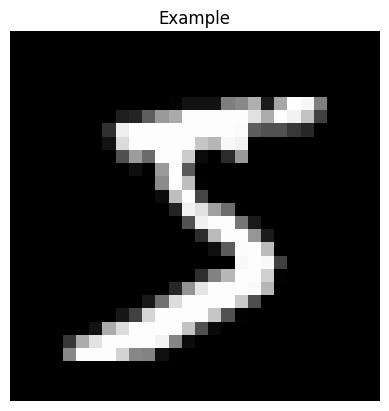

In [152]:
#Importing the dataset

# Load the MNIST dataset
DATABASE='mnist'
#DATABASE='fashion'
CLASS_TO_GENERATE=None
#DATABASE='cifar10'

if DATABASE=='cifar10':
   #https://en.wikipedia.org/wiki/CIFAR-10
   (X, Y), (XTEST, YTEST) = keras.datasets.cifar10.load_data()
   N,W,H,B=X.shape
   classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
   CLASS_TO_GENERATE=0
   X=X[np.nonzero(Y==CLASS_TO_GENERATE)[0],:,:,:]
   XTEST=XTEST[np.nonzero(YTEST==CLASS_TO_GENERATE)[0],:,:,:]
   print('Using class:',classes[CLASS_TO_GENERATE])
   NSAMPLES=2000
   CMAP=None

elif DATABASE=='mnist':
#https://en.wikipedia.org/wiki/MNIST_database
  (X, Y), (XTEST, YTEST) = keras.datasets.mnist.load_data()
  X=np.expand_dims(X,axis=-1)
  XTEST=np.expand_dims(XTEST,axis=-1)
  if CLASS_TO_GENERATE is not None:
    X=X[np.nonzero(Y==CLASS_TO_GENERATE)[0],:,:,:]
    XTEST=XTEST[np.nonzero(YTEST==CLASS_TO_GENERATE)[0],:,:,:]
  N,W,H,B=X.shape
  NSAMPLES=1000
  CMAP='gray'

elif DATABASE=='fashion':
   #https://fr.wikipedia.org/wiki/Fashion_MNIST
  (X, Y), (XTEST, YTEST) = keras.datasets.fashion_mnist.load_data()
  X=np.expand_dims(X,axis=-1)
  XTEST=np.expand_dims(XTEST,axis=-1)
  if CLASS_TO_GENERATE is not None:
    X=X[np.nonzero(Y==CLASS_TO_GENERATE)[0],:,:,:]
    XTEST=XTEST[np.nonzero(YTEST==CLASS_TO_GENERATE)[0],:,:,:]
  N,W,H,B=X.shape
  NSAMPLES=1000
  CMAP='gray'

plt.imshow(X[0],cmap='gray')
plt.title('Example')
plt.axis('off')
plt.show()





# Transform to [0,1.] because the model is using sigmoid activation
X=X/255.

X=X[0:NSAMPLES,:,:]
X=np.reshape(X,[NSAMPLES,W*H*B])

XTEST=XTEST/255.

XTEST=XTEST[0:NSAMPLES_TEST,:,:]
XTEST=np.reshape(XTEST,[NSAMPLES_TEST,W*H*B])


### Principal Component Analysis (PCA)

is a dimensionality reduction technique commonly used in data analysis and machine learning. It aims to transform a high-dimensional dataset into a lower-dimensional space while preserving the most important information. PCA achieves this by identifying the principal components, which are linear combinations of the original features that capture the maximum variance in the data. The first principal component explains the largest amount of variance, followed by the second principal component, and so on. By reducing the dimensionality of the dataset, PCA can simplify the analysis, visualize the data in lower-dimensional space, and remove redundant or noisy features. It is particularly useful when dealing with datasets with a large number of variables or when visualizing high-dimensional data.

https://en.wikipedia.org/wiki/Principal_component_analysis


(1000, 784)
(1000, 49)


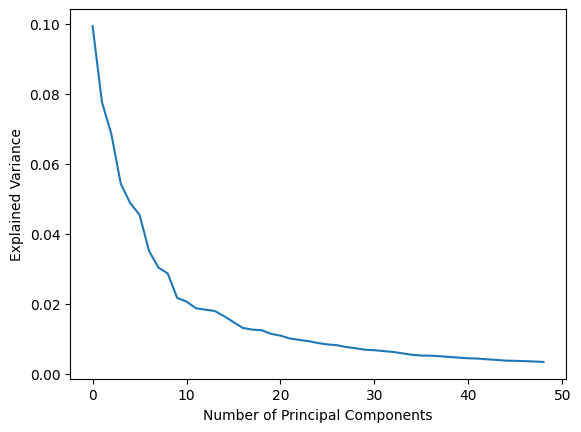

In [153]:
DIMENSION_PCA=LATENT_DIM

pca = PCA(n_components=DIMENSION_PCA)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
print(X.shape)
print(X_pca.shape)

In [154]:
#Compute the inverse projection from X_pca

X_inverse = pca.inverse_transform(X_pca)


#Compute the reconstruction error

reconstruction_error_PCA=keras.ops.mean(keras.ops.sum(keras.losses.binary_crossentropy(np.reshape(X,[NSAMPLES,H,W,B]),np.reshape(X_inverse,[NSAMPLES,H,W,B])),axis=(1, 2))).numpy()
print(reconstruction_error_PCA)

78.20295303147483


<ipython-input-155-e50ea1a833e2>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx=int(idx)


(-0.5, 27.5, 27.5, -0.5)

<Figure size 1200x1200 with 0 Axes>

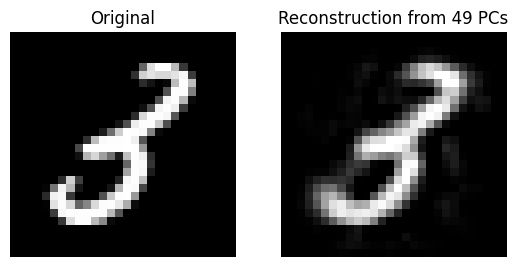

In [155]:
plt.figure(figsize=(12,12))
idx=np.random.rand(1)*NSAMPLES
idx=int(idx)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.reshape(X[idx:(idx+1),:],[W,H,B]),cmap=CMAP)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Reconstruction from '+str(DIMENSION_PCA)+' PCs')
plt.imshow(np.clip(np.reshape(X_inverse[idx:(idx+1),:],[W,H,B]),0.,1.),cmap=CMAP)
plt.axis('off')


Generation from random sampling in GMM
generate_sample_pca (200, 784)


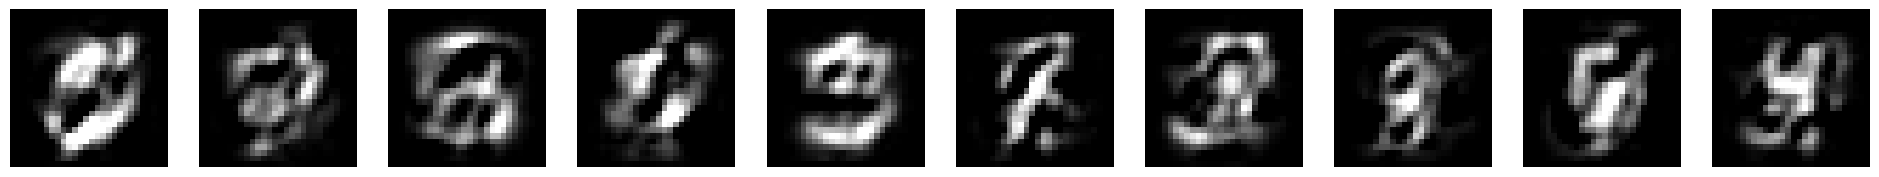

14.012523901465235


In [156]:
# Fit one multivariate gaussian distributions on reconstruction from PCA
mm_pca = GaussianMixture(n_components=1, covariance_type='diag', random_state=0).fit(X_pca)

print('Generation from random sampling in GMM')
sample = mm_pca.sample(NSAMPLES_TEST)
#sample[0].shape
generate_sample_pca= pca.inverse_transform(sample[0])
print('generate_sample_pca', generate_sample_pca.shape)

plt.figure(figsize=[24,24])
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(np.clip(np.reshape(generate_sample_pca[i,:],[W,H,B]),0,1),cmap=CMAP)
  plt.axis('off')
plt.show()

mmd_pca_GMM_only_one_cluster= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_pca,[NSAMPLES_TEST,H*W*B]))
print(mmd_pca_GMM_only_one_cluster)


In [157]:
MAX_NUMBER_OF_GAUSSIANS=30
res_mmd_pca=[]
for NUMBER_OF_GAUSSIANS in range(1,MAX_NUMBER_OF_GAUSSIANS):
  print('Computing MMD for ',NUMBER_OF_GAUSSIANS,' Gaussians')
  gmm_pca= GaussianMixture(n_components=NUMBER_OF_GAUSSIANS,covariance_type='diag', random_state=0).fit(X_pca)
  sample = gmm_pca.sample(NSAMPLES_TEST)
  generate_sample_pca= pca.inverse_transform(sample[0])
  mmd_pca_GMM= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_pca,[NSAMPLES_TEST,H*W*B]))
  res_mmd_pca.append(mmd_pca_GMM)
  print(mmd_pca_GMM)




Computing MMD for  1  Gaussians
14.012523901465235
Computing MMD for  2  Gaussians
13.944771271670708
Computing MMD for  3  Gaussians
11.90418005003191
Computing MMD for  4  Gaussians
16.3780035925869
Computing MMD for  5  Gaussians
13.07664130191899
Computing MMD for  6  Gaussians
11.595632953607549
Computing MMD for  7  Gaussians
14.051643106256284
Computing MMD for  8  Gaussians
16.23656899983161
Computing MMD for  9  Gaussians
15.308654018434398
Computing MMD for  10  Gaussians
12.089815595765163
Computing MMD for  11  Gaussians
13.118555699933587
Computing MMD for  12  Gaussians
12.369820312543744
Computing MMD for  13  Gaussians
10.398291457820008
Computing MMD for  14  Gaussians
12.818094830854276
Computing MMD for  15  Gaussians
15.869628822451354
Computing MMD for  16  Gaussians
16.35615224633802
Computing MMD for  17  Gaussians
14.893607305367595
Computing MMD for  18  Gaussians
14.265119425601602
Computing MMD for  19  Gaussians
14.240740528445484
Computing MMD for  20  Gaus

***************************


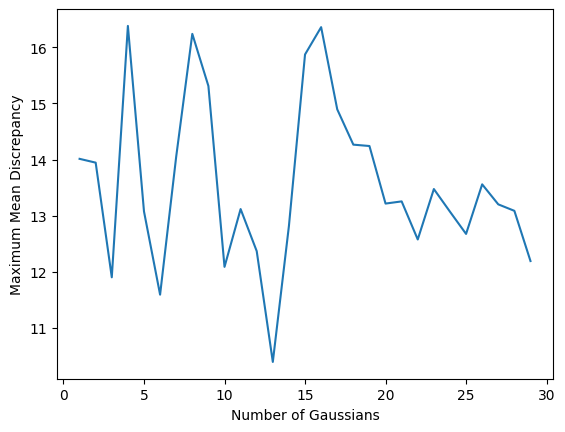

13


In [158]:
plt.figure()
plt.plot(range(1,MAX_NUMBER_OF_GAUSSIANS),res_mmd_pca,label='Diag Conv')
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()

NUM_GAUSSIANS_PCA=np.argmin(res_mmd_pca)+1
print(NUM_GAUSSIANS_PCA)

In [159]:
# Fit K gaussian distributions on X_inverse
gmm_pca= GaussianMixture(n_components=NUM_GAUSSIANS_PCA, covariance_type='diag', random_state=0).fit(X_pca)

# You can access the parameters of the fitted GMM using:
# gmm.means_  # Means of the Gaussian components
# gmm.covariances_  # Covariance matrices of the Gaussian components
# gmm.weights_  # Weights of the Gaussian components

Q1. Compute the reconstruction of the vector corresponding to the mean vector of each cluster.

(13, 49)
Generation from Mean Vectors in each cluster


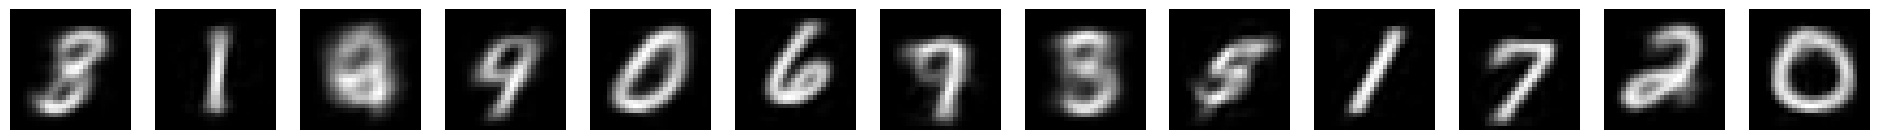

In [160]:
#Q1. Compute the reconstruction of the vector corresponding to the mean vector of each cluster.

print(gmm_pca.means_.shape)
gmm_pca_means = pca.inverse_transform(gmm_pca.means_)

print('Generation from Mean Vectors in each cluster')
plt.figure(figsize=[24,24])
for i in range(gmm_pca_means.shape[0]):
  plt.subplot(1,gmm_pca_means.shape[0],i+1)
  plt.imshow(np.clip(np.reshape(gmm_pca_means[i,:],[W,H,B]),0,1),cmap=CMAP)
  plt.axis('off')
plt.show()

Generation from random sampling in GMM


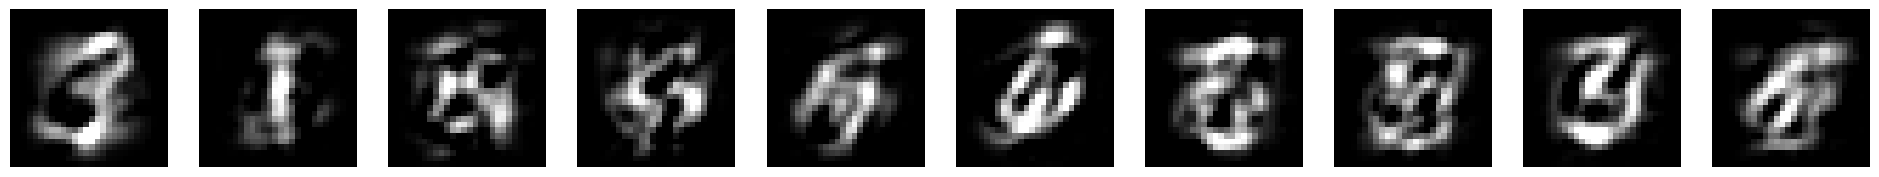

In [161]:
print('Generation from random sampling in GMM')
NUMBER_GENERATED_SAMPLES=10
sample = gmm_pca.sample(NUMBER_GENERATED_SAMPLES)
#sample[0].shape
new_sample_inverse = pca.inverse_transform(sample[0])

plt.figure(figsize=[24,24])
for i in range(NUMBER_GENERATED_SAMPLES):
  plt.subplot(1,NUMBER_GENERATED_SAMPLES,i+1)
  plt.imshow(np.clip(np.reshape(new_sample_inverse[i,:],[W,H,B]),0,1),cmap=CMAP)
  plt.axis('off')
plt.show()

In [162]:
print('Generation from random sampling in GMM on latent space produced by PCA')
NUMBER_GENERATED_SAMPLES=NSAMPLES
generated_gmm_pca=pca.inverse_transform(gmm_pca.sample(NSAMPLES_TEST)[0])
mmd_gmm_pca= mmd(np.reshape(XTEST,[XTEST.shape[0],W*H*B]), np.reshape(generated_gmm_pca,[NSAMPLES_TEST,W*H*B]))
print('MMD',mmd_gmm_pca)

Generation from random sampling in GMM on latent space produced by PCA
MMD 10.398291457820008


## AUTOENCODER

In [163]:
X=np.reshape(X,[X.shape[0],W,H,B])
print(X.shape)

XTEST=np.reshape(XTEST,[XTEST.shape[0],W,H,B])
print(XTEST.shape)

(1000, 28, 28, 1)
(200, 28, 28, 1)


In [164]:
model_encoder= get_model_enconder(input_shape=[W,H,B])
model_encoder.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 49)                  │         153,713 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,529 (673.94 KB)

 Trainable params: 172,529 (673.94 KB)

 Non-trainable params: 0 (0.00 B)

In [165]:
model_decoder= get_model_decoder()
model_decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3136)                │         156,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_24                  │ (None, 14, 14, 64)          │          36,928 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 14, 14, 32)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_24               │ (None, 14, 14, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_24 (ReLU)                      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_25                  │ (None, 28, 28, 32)          │           9,248 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 28, 28, 32)          │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_25               │ (None, 28, 28, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_25 (ReLU)                      │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_26                  │ (None, 28, 28, 16)          │           4,608 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_26               │ (None, 28, 28, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_26 (ReLU)                      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,537 (920.07 KB)

 Trainable params: 235,537 (920.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder = AE(model_encoder, model_decoder)
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=.01))

CB = [keras.callbacks.EarlyStopping(monitor='total_loss', mode='min',patience=20,restore_best_weights=True),
      keras.callbacks.ReduceLROnPlateau(monitor='total_loss', mode='min', factor=0.1,patience=10, min_lr=0.00001, verbose=1)
     ]
historyautoencoder=autoencoder.fit(X,epochs=NUM_EPOCHS,batch_size=BATCH_SIZE,verbose=2,callbacks=CB)


Epoch 1/256
32/32 - 10s - 306ms/step - reconstruction_loss: 328.5539 - total_loss: 328.5539 - learning_rate: 0.0100
Epoch 2/256
32/32 - 5s - 147ms/step - reconstruction_loss: 298.4006 - total_loss: 298.4006 - learning_rate: 0.0100
Epoch 3/256
32/32 - 5s - 153ms/step - reconstruction_loss: 286.2318 - total_loss: 286.2318 - learning_rate: 0.0100
Epoch 4/256
32/32 - 7s - 214ms/step - reconstruction_loss: 265.2003 - total_loss: 265.2003 - learning_rate: 0.0100
Epoch 5/256
32/32 - 9s - 273ms/step - reconstruction_loss: 212.4998 - total_loss: 212.4998 - learning_rate: 0.0100
Epoch 6/256
32/32 - 6s - 190ms/step - reconstruction_loss: 182.5913 - total_loss: 182.5913 - learning_rate: 0.0100
Epoch 7/256
32/32 - 11s - 348ms/step - reconstruction_loss: 152.2911 - total_loss: 152.2911 - learning_rate: 0.0100
Epoch 8/256
32/32 - 8s - 253ms/step - reconstruction_loss: 139.5506 - total_loss: 139.5506 - learning_rate: 0.0100
Epoch 9/256
32/32 - 7s - 211ms/step - reconstruction_loss: 130.7202 - total_lo

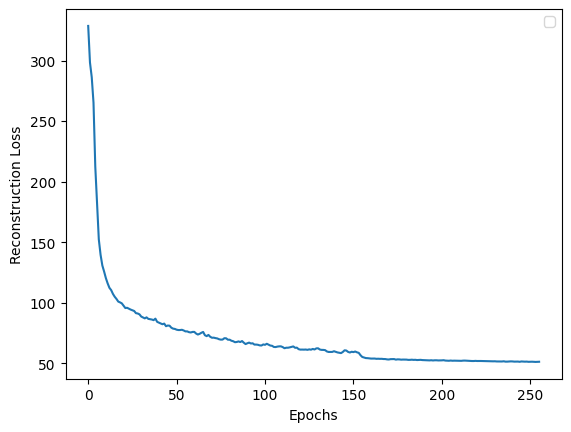

In [167]:
plt.plot(historyautoencoder.history['reconstruction_loss'])
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.legend()

In [168]:
X_autoencoder=autoencoder.encode(X)
print(X_autoencoder.shape)

(1000, 49)


(200, 49)


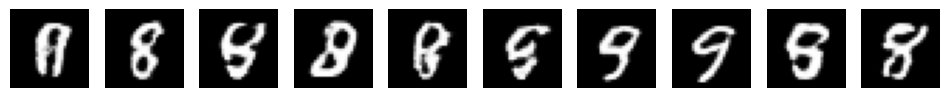

In [169]:
gmm_autoencoder = GaussianMixture(n_components=1, covariance_type='spherical', random_state=0).fit(X_autoencoder)

plt.figure(figsize=[12,12])
z=gmm_autoencoder.sample(NSAMPLES_TEST)[0]
print(z.shape)
generated_examples_autoencoder_GMM = autoencoder.decode(z)
for j in range(10):
  plt.subplot(1,10,j+1)
  plt.imshow(np.reshape(generated_examples_autoencoder_GMM[j],[W,H,B]),cmap=CMAP)
  plt.axis('off')
plt.show()

In [170]:
mmd_gmm_autoencoder= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generated_examples_autoencoder_GMM,[NSAMPLES_TEST,H*W*B]))
print(mmd_gmm_autoencoder)

100.82960572255773


In [171]:
print('NMD PCA+GMM sampler',mmd_gmm_pca)
print('NMD AUTOENCODER+GMM sampler',mmd_gmm_autoencoder)

NMD PCA+GMM sampler 10.398291457820008
NMD AUTOENCODER+GMM sampler 100.82960572255773


In [172]:
def find_best_GMM_by_MMD(autoencoder,xtrue,MAX_NUMBER_OF_GAUSSIANS=MAX_NUMBER_OF_GAUSSIANS):
    """ This funcion determine the number of Gaussians for a Gaussain Mixure model that minize the Maximum Mean Discrepancy"""
    res_mmd_autoencoder=[]
    NSAMPLES=xtrue.shape[0]
    X_encoded=autoencoder.encode(xtrue)
    for NUMBER_OF_GAUSSIANS in range(1,MAX_NUMBER_OF_GAUSSIANS):
        print('Number of Gaussians:',NUMBER_OF_GAUSSIANS)
        gmm_autoenconder = GaussianMixture(n_components=NUMBER_OF_GAUSSIANS,covariance_type='diag', random_state=0).fit(X_encoded)
        sample = gmm_autoenconder.sample(NSAMPLES)
        generate_sample_autoenconder= autoencoder.decode(sample[0])
        mmd_gmm_autoencoder= mmd(np.reshape(xtrue,[NSAMPLES,H*W*B]), np.reshape(generate_sample_autoenconder,[NSAMPLES,H*W*B]))
        res_mmd_autoencoder.append(mmd_gmm_autoencoder)
    plt.plot(res_mmd_autoencoder)
    plt.xlabel('Number of Gaussians')
    plt.ylabel('Maximum Mean Discrepancy')
    return np.argmin(res_mmd_autoencoder)+1,res_mmd_autoencoder


Number of Gaussians: 1
Number of Gaussians: 2
Number of Gaussians: 3
Number of Gaussians: 4
Number of Gaussians: 5
Number of Gaussians: 6
Number of Gaussians: 7
Number of Gaussians: 8
Number of Gaussians: 9
Number of Gaussians: 10
Number of Gaussians: 11
Number of Gaussians: 12
Number of Gaussians: 13
Number of Gaussians: 14
Number of Gaussians: 15
Number of Gaussians: 16
Number of Gaussians: 17
Number of Gaussians: 18
Number of Gaussians: 19
Number of Gaussians: 20
Number of Gaussians: 21
Number of Gaussians: 22
Number of Gaussians: 23
Number of Gaussians: 24
Number of Gaussians: 25
Number of Gaussians: 26
Number of Gaussians: 27
Number of Gaussians: 28
Number of Gaussians: 29
8


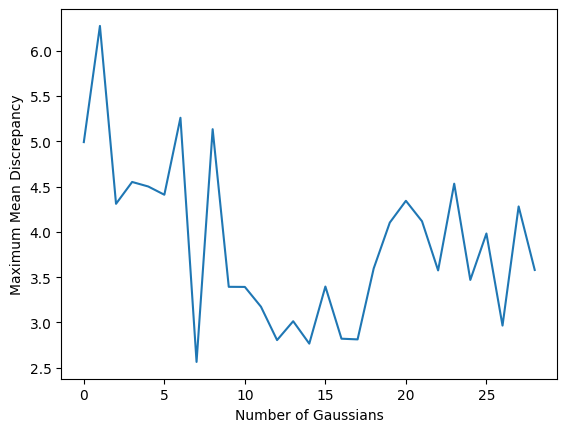

In [173]:
NUM_GAUSSIANS_AUTOENCODER,res_mmd_autoencoder=find_best_GMM_by_MMD(autoencoder,XTEST)
print(NUM_GAUSSIANS_AUTOENCODER)

In [175]:
autoencoder.fitGMM(X,NUM_GAUSSIANS_AUTOENCODER)

GaussianMixture(covariance_type='diag', n_components=8, random_state=0)

Generation of Latent Space (200, 49)
Generated Images (200, 28, 28, 1)


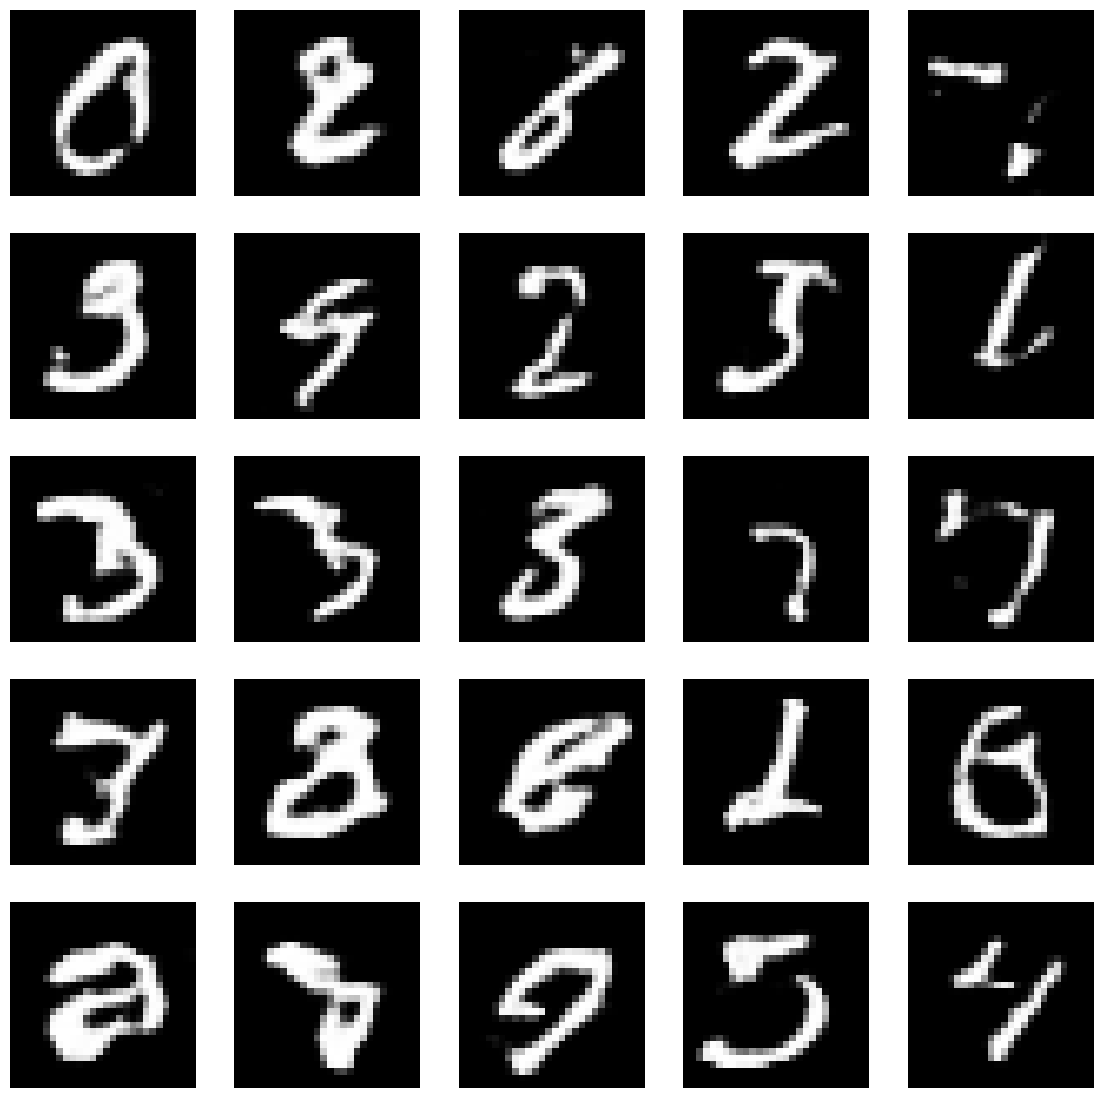

In [176]:

sample_gmm_autoencoder=autoencoder.sampleGMM(NSAMPLES_TEST)[0]
print('Generation of Latent Space',sample_gmm_autoencoder.shape)
generate_sample_autoencoder= autoencoder.decode(sample_gmm_autoencoder)
print('Generated Images',generate_sample_autoencoder.shape)

plt.figure(figsize=[14,14])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(np.reshape(generate_sample_autoencoder[i],[W,H,B]),cmap=CMAP)
    plt.axis('off')
plt.show()

***************************


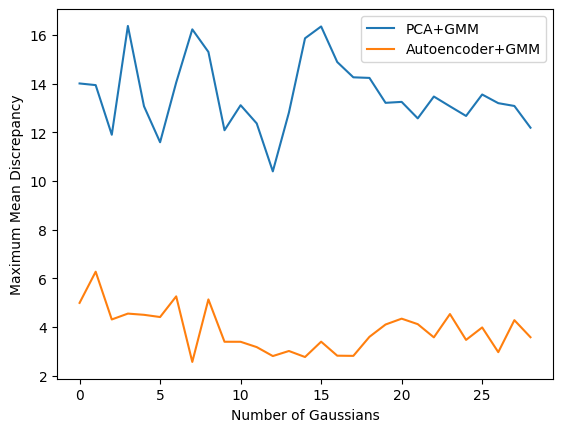

In [177]:
plt.plot(res_mmd_pca,label='PCA+GMM')
plt.plot(res_mmd_autoencoder,label='Autoencoder+GMM')
plt.legend()
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()

## Variational Autoencoder

In [180]:
variational_encoder= get_model_variational_enconder(input_shape=[W,H,B])
variational_decoder= get_model_variational_decoder()

In [ ]:
variational_autoencoder = VAE(variational_encoder, variational_decoder)
variational_autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=.001))
historyvae=variational_autoencoder.fit(X,epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - kl_loss: 0.4755 - loss: 391.1391 - reconstruction_loss: 391.0916
Epoch 2/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - kl_loss: 3.4715 - loss: 288.0911 - reconstruction_loss: 287.7440
Epoch 3/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - kl_loss: 21.3930 - loss: 203.4901 - reconstruction_loss: 201.3508
Epoch 4/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - kl_loss: 54.2472 - loss: 147.9257 - reconstruction_loss: 142.5010
Epoch 5/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - kl_loss: 69.6972 - loss: 121.3400 - reconstruction_loss: 114.3703
Epoch 6/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - kl_loss: 75.5594 - loss: 106.5434 - reconstruction_loss: 98.9875
Epoch 7/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - kl_loss: 78.9147 - loss: 96.8171 - reconstruction_loss: 88.9257
Epoch 8/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - kl_loss: 83.9386 - loss: 94.2861 - reconstruction_loss: 85.8923
Epoch 9/256
32/32 ━━━━━━━━━━━━━━━━━━

In [ ]:
plt.subplot(1,2,1)
plt.plot(historyvae.history['reconstruction_loss'])
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.subplot(1,2,2)
plt.plot(historyvae.history['kl_loss'])
plt.xlabel('Epochs')
plt.ylabel('KL Loss')

Number of Gaussians: 1
Number of Gaussians: 2
Number of Gaussians: 3
Number of Gaussians: 4
Number of Gaussians: 5
Number of Gaussians: 6
Number of Gaussians: 7
Number of Gaussians: 8
Number of Gaussians: 9
Number of Gaussians: 10
Number of Gaussians: 11
Number of Gaussians: 12
Number of Gaussians: 13
Number of Gaussians: 14
Number of Gaussians: 15
Number of Gaussians: 16
Number of Gaussians: 17
Number of Gaussians: 18
Number of Gaussians: 19
Number of Gaussians: 20
Number of Gaussians: 21
Number of Gaussians: 22
Number of Gaussians: 23
Number of Gaussians: 24
Number of Gaussians: 25
Number of Gaussians: 26
Number of Gaussians: 27
Number of Gaussians: 28
Number of Gaussians: 29
22


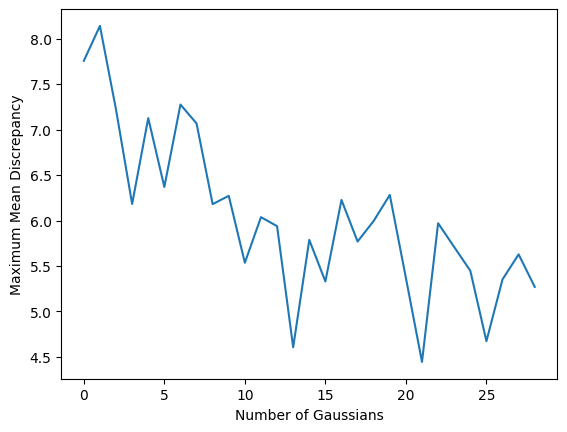

In [144]:
NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER,res_mmd_variational_autoencoder=find_best_GMM_by_MMD(variational_autoencoder,XTEST)
print(NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER)

In [183]:
variational_autoencoder.fitGMM(X,NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER)

GaussianMixture(covariance_type='diag', n_components=22, random_state=0)

Generation of Latent Space (200, 49)
Generated Images (200, 28, 28, 1)


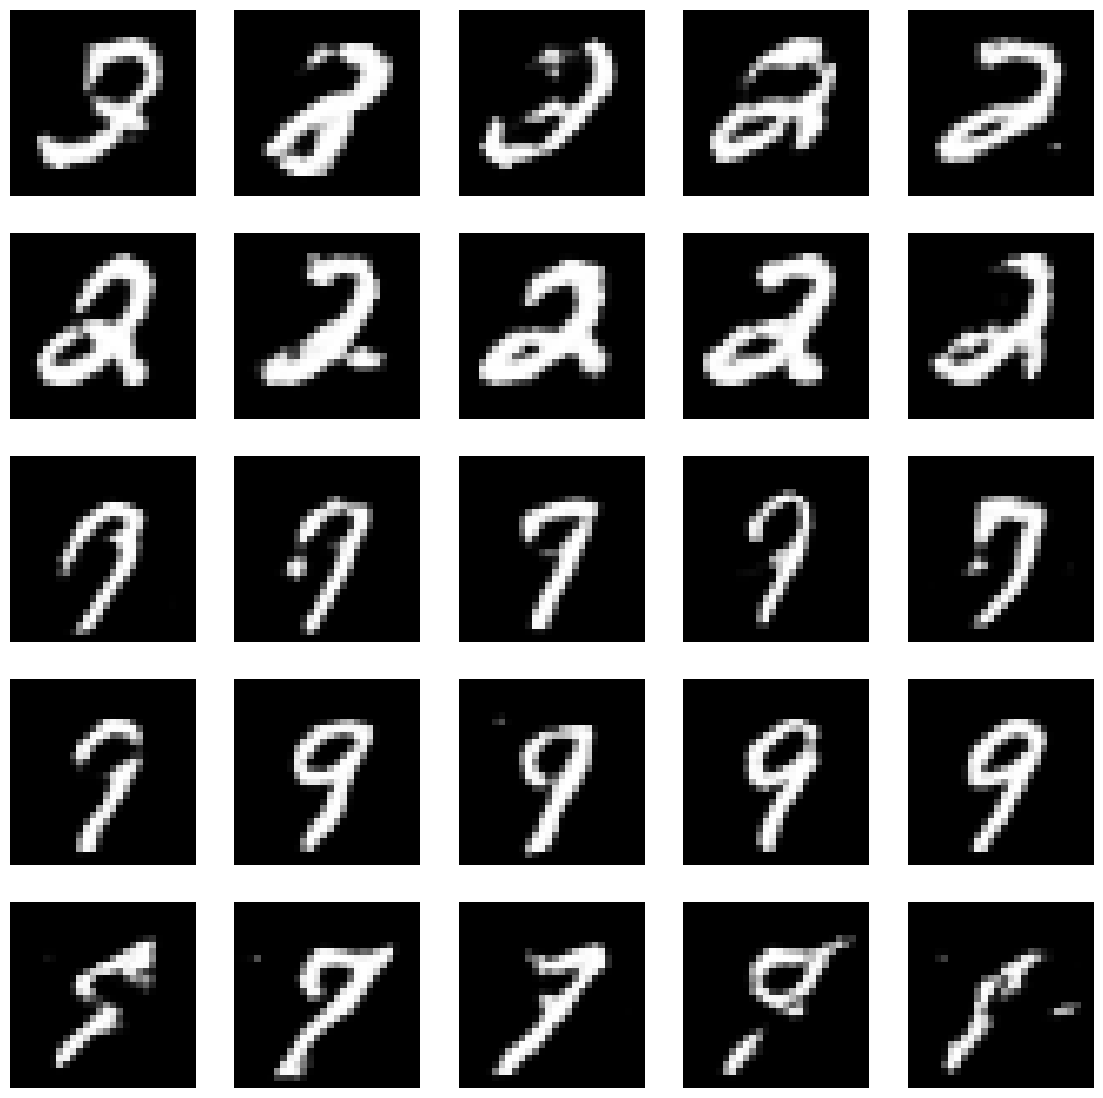

In [184]:
sample_gmm_variational_autoencoder=variational_autoencoder.sampleGMM(NSAMPLES_TEST)[0]
print('Generation of Latent Space',sample_gmm_variational_autoencoder.shape)
generate_sample_variational_autoencoder= variational_autoencoder.decode(sample_gmm_variational_autoencoder)
print('Generated Images',generate_sample_variational_autoencoder.shape)

plt.figure(figsize=[14,14])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(np.reshape(generate_sample_variational_autoencoder[i],[W,H,B]),cmap=CMAP)
    plt.axis('off')
plt.show()

In [185]:

mmd_gmm_variational_autoenconder= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_variational_autoencoder,[NSAMPLES_TEST,H*W*B]))


***************************


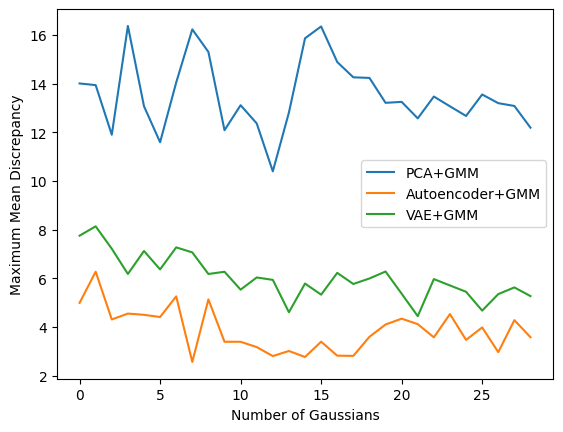

In [186]:
plt.plot(res_mmd_pca,label='PCA+GMM')
plt.plot(res_mmd_autoencoder,label='Autoencoder+GMM')
plt.plot(res_mmd_variational_autoencoder,label='VAE+GMM')
plt.legend()
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()



Question: According to MMD criteria which will be the best generator PCA, AutoEncoder, VAE?

Based on the MMD criterion and the plot above, we can clearly see that both the autoencoder (AE) and the variational autoencoder (VAE) outperform PCA. The MMD criterion indicates that the distributions of the ground truth samples and the generated samples are much more similar for the two types of autoencoders compared to those generated by PCA. Furthermore, the MMD values suggest that the AE slightly outperforms the VAE in generating samples that are closer to the ground truth distribution.

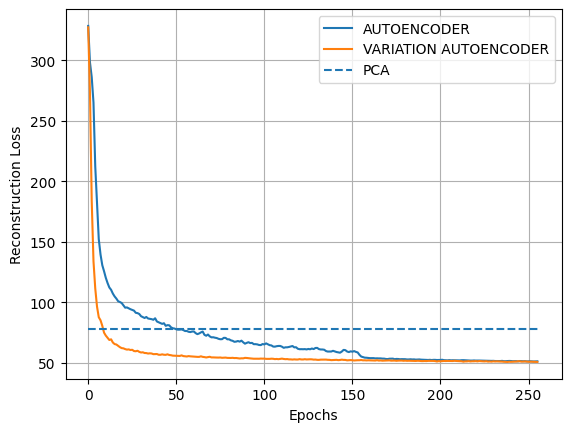

In [187]:
plt.plot(historyautoencoder.history['reconstruction_loss'],label='AUTOENCODER')
plt.plot(historyvae.history['reconstruction_loss'],label='VARIATION AUTOENCODER')
plt.hlines(reconstruction_error_PCA,0,NUM_EPOCHS,linestyles='dashed',label='PCA')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.grid()
plt.legend()

Question: According to Reconstruction Loss criteria which will be the best generator PCA, AutoEconder, VAE? The lower the reconstruction loss, the better.

Without training, PCA performs better than the autoencoder and VAE. However, it does not make sense to use autoencoders without training. With training, both the autoencoder and the VAE converge to similar MMD values, around 50, which is significantly better than PCA's MMD value of approximately 80.

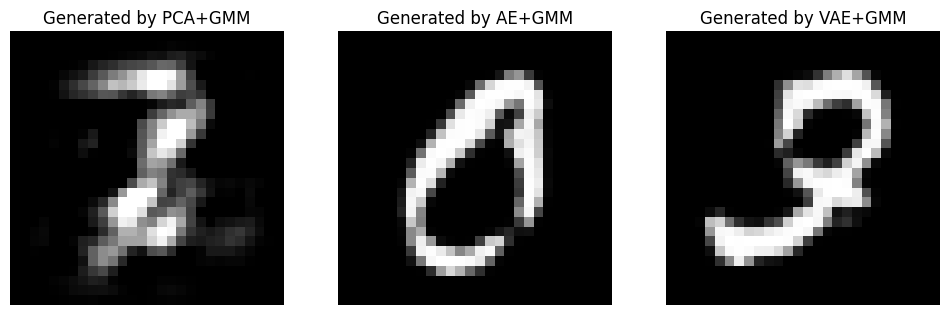

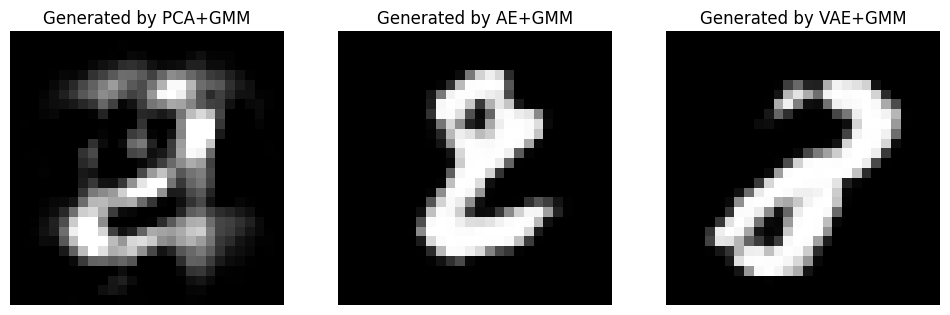

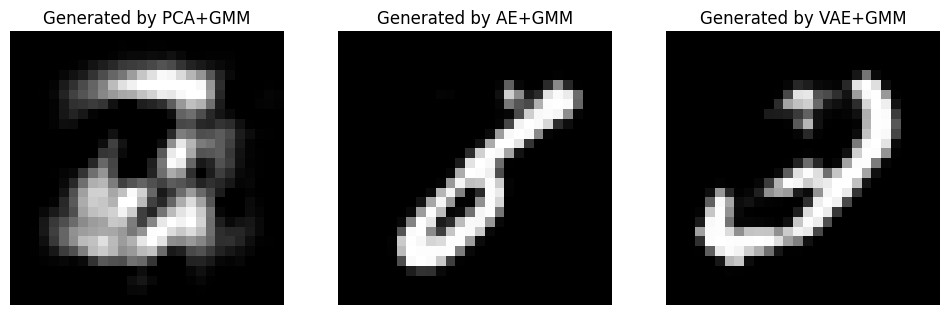

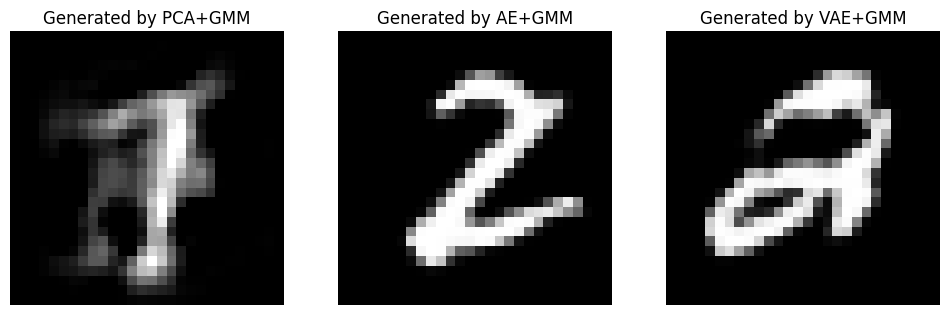

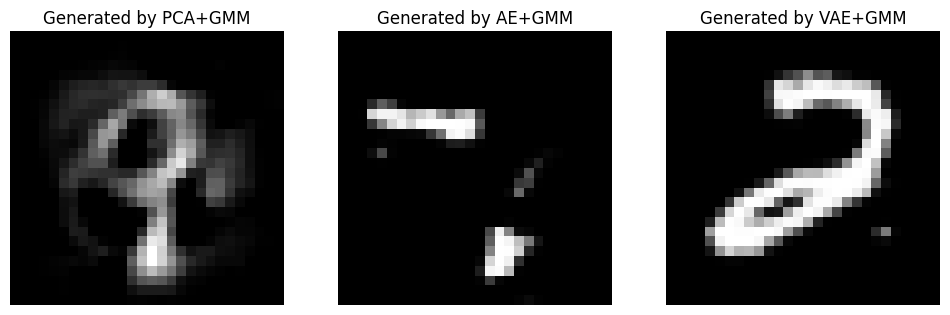

In [188]:
generate_sample_pca=np.reshape(generate_sample_pca,[NSAMPLES_TEST,H,W,B])

#Just if case for debugging
#print(generate_sample_pca.shape)
#print(generate_sample_autoencoder.shape)
#print(generate_sample_variational_autoencoder.shape)


for i in range(5):
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.clip(generate_sample_pca[i],0.,1.),cmap=CMAP)
    plt.title('Generated by PCA+GMM')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(generate_sample_autoencoder[i],cmap=CMAP)
    plt.title('Generated by AE+GMM')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(generate_sample_variational_autoencoder[i],cmap=CMAP)
    plt.title('Generated by VAE+GMM')
    plt.axis('off')
    plt.show()



Question: According to visual appearance, which of the three methods do you prefer and why?

For the PCA reconstruction, the samples appear very blurry, making the patterns or numbers difficult to identify. The VAE-generated samples have more recognizable shapes but still remain somewhat blurry. In contrast, the autoencoder-generated samples are sharp and easily recognizable. Based on visual appearance, the autoencoder appears to be the most effective algorithm for generating samples.

## Homework on fashion

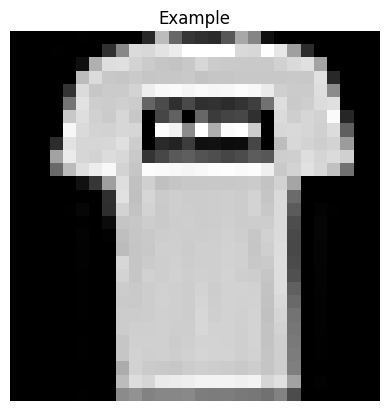

In [90]:
DATABASE = 'fashion'
if DATABASE=='fashion':
   #https://fr.wikipedia.org/wiki/Fashion_MNIST
  (X, Y), (XTEST, YTEST) = keras.datasets.fashion_mnist.load_data()
  X=np.expand_dims(X,axis=-1)
  XTEST=np.expand_dims(XTEST,axis=-1)
  X=X[np.nonzero(Y==0)[0],:,:,:]
  XTEST=XTEST[np.nonzero(YTEST==0)[0],:,:,:]
  N,W,H,B=X.shape
  NSAMPLES=1000
  CMAP='gray'
X=X/255.


plt.imshow(X[0],cmap='gray')
plt.title('Example')
plt.axis('off')
plt.show()

X=X[0:NSAMPLES,:,:]
X=np.reshape(X,[NSAMPLES,W*H*B])

XTEST=XTEST/255.

XTEST=XTEST[0:NSAMPLES_TEST,:,:]
XTEST=np.reshape(XTEST,[NSAMPLES_TEST,W*H*B])

In [62]:
X.shape

(1000, 784)

### PCA

(1000, 784)
(1000, 49)


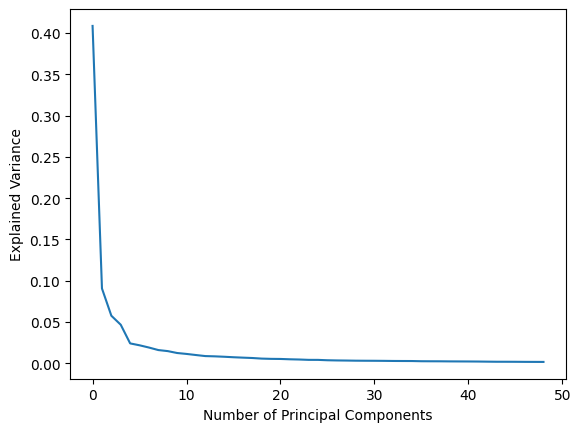

In [63]:
DIMENSION_PCA=LATENT_DIM

pca = PCA(n_components=DIMENSION_PCA)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
print(X.shape)
print(X_pca.shape)

In [64]:
#Compute the inverse projection from X_pca

X_inverse = pca.inverse_transform(X_pca)


#Compute the reconstruction error

reconstruction_error_PCA=keras.ops.mean(keras.ops.sum(keras.losses.binary_crossentropy(np.reshape(X,[NSAMPLES,H,W,B]),np.reshape(X_inverse,[NSAMPLES,H,W,B])),axis=(1, 2))).numpy()
print(reconstruction_error_PCA)

246.60302792482628


<ipython-input-65-e50ea1a833e2>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx=int(idx)


(-0.5, 27.5, 27.5, -0.5)

<Figure size 1200x1200 with 0 Axes>

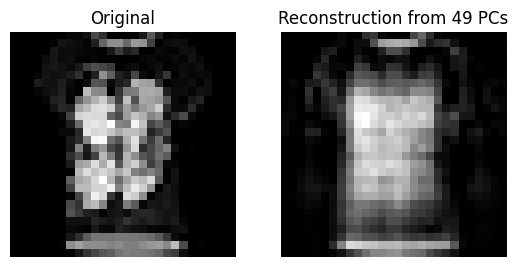

In [65]:
plt.figure(figsize=(12,12))
idx=np.random.rand(1)*NSAMPLES
idx=int(idx)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.reshape(X[idx:(idx+1),:],[W,H,B]),cmap=CMAP)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Reconstruction from '+str(DIMENSION_PCA)+' PCs')
plt.imshow(np.clip(np.reshape(X_inverse[idx:(idx+1),:],[W,H,B]),0.,1.),cmap=CMAP)
plt.axis('off')


Generation from random sampling in GMM
generate_sample_pca (200, 784)


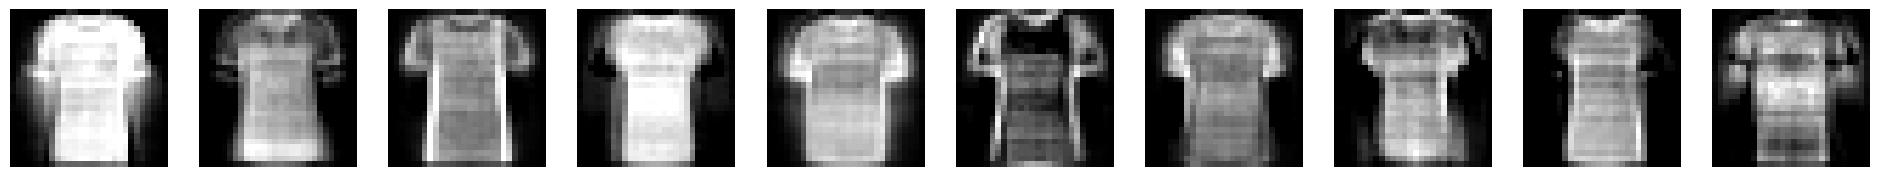

2.7957782664609354


In [66]:
# Fit one multivariate gaussian distributions on reconstruction from PCA
mm_pca = GaussianMixture(n_components=1, covariance_type='diag', random_state=0).fit(X_pca)

print('Generation from random sampling in GMM')
sample = mm_pca.sample(NSAMPLES_TEST)
#sample[0].shape
generate_sample_pca= pca.inverse_transform(sample[0])
print('generate_sample_pca', generate_sample_pca.shape)

plt.figure(figsize=[24,24])
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(np.clip(np.reshape(generate_sample_pca[i,:],[W,H,B]),0,1),cmap=CMAP)
  plt.axis('off')
plt.show()

mmd_pca_GMM_only_one_cluster= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_pca,[NSAMPLES_TEST,H*W*B]))
print(mmd_pca_GMM_only_one_cluster)


In [67]:
MAX_NUMBER_OF_GAUSSIANS=30
res_mmd_pca=[]
for NUMBER_OF_GAUSSIANS in range(1,MAX_NUMBER_OF_GAUSSIANS):
  print('Computing MMD for ',NUMBER_OF_GAUSSIANS,' Gaussians')
  gmm_pca= GaussianMixture(n_components=NUMBER_OF_GAUSSIANS,covariance_type='diag', random_state=0).fit(X_pca)
  sample = gmm_pca.sample(NSAMPLES_TEST)
  generate_sample_pca= pca.inverse_transform(sample[0])
  mmd_pca_GMM= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_pca,[NSAMPLES_TEST,H*W*B]))
  res_mmd_pca.append(mmd_pca_GMM)
  print(mmd_pca_GMM)

Computing MMD for  1  Gaussians
2.7957782664609354
Computing MMD for  2  Gaussians
3.989248500277043
Computing MMD for  3  Gaussians
3.199307479906599
Computing MMD for  4  Gaussians
3.8226265877514543
Computing MMD for  5  Gaussians
2.7954957731193275
Computing MMD for  6  Gaussians
2.090538673380049
Computing MMD for  7  Gaussians
5.291056108201575
Computing MMD for  8  Gaussians
2.5612915859212215
Computing MMD for  9  Gaussians
3.220170669162359
Computing MMD for  10  Gaussians
2.066431997371998
Computing MMD for  11  Gaussians
3.695412435931633
Computing MMD for  12  Gaussians
2.592355607469843
Computing MMD for  13  Gaussians
4.7251229805271855
Computing MMD for  14  Gaussians
2.9046804412604654
Computing MMD for  15  Gaussians
4.806462336033324
Computing MMD for  16  Gaussians
2.64478220565989
Computing MMD for  17  Gaussians
2.366187576274381
Computing MMD for  18  Gaussians
3.2452061531840215
Computing MMD for  19  Gaussians
2.754231160344789
Computing MMD for  20  Gaussians
3

***************************


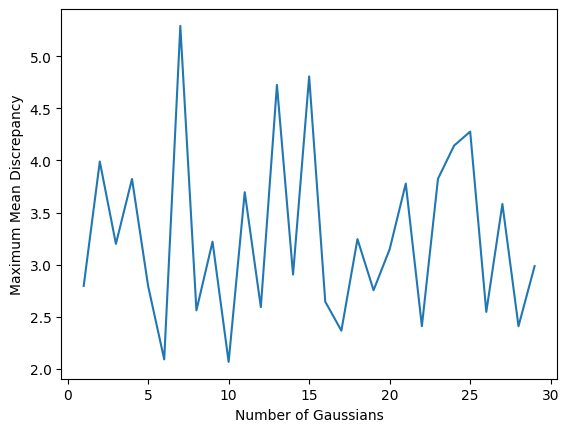

10


In [68]:
plt.figure()
plt.plot(range(1,MAX_NUMBER_OF_GAUSSIANS),res_mmd_pca,label='Diag Conv')
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()

NUM_GAUSSIANS_PCA=np.argmin(res_mmd_pca)+1
print(NUM_GAUSSIANS_PCA)

In [69]:
print('Generation from random sampling in GMM on latent space produced by PCA')
NUMBER_GENERATED_SAMPLES=NSAMPLES
generated_gmm_pca=pca.inverse_transform(gmm_pca.sample(NSAMPLES_TEST)[0])
mmd_gmm_pca= mmd(np.reshape(XTEST,[XTEST.shape[0],W*H*B]), np.reshape(generated_gmm_pca,[NSAMPLES_TEST,W*H*B]))
print('MMD',mmd_gmm_pca)

Generation from random sampling in GMM on latent space produced by PCA
MMD 2.985688584797641


### Autoencoder

In [70]:
X=np.reshape(X,[X.shape[0],W,H,B])
print(X.shape)

XTEST=np.reshape(XTEST,[XTEST.shape[0],W,H,B])
print(XTEST.shape)

model_encoder= get_model_enconder(input_shape=[W,H,B])
model_encoder.summary()

model_decoder= get_model_decoder()
model_decoder.summary()

(1000, 28, 28, 1)
(200, 28, 28, 1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 49)                  │         153,713 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,529 (673.94 KB)

 Trainable params: 172,529 (673.94 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3136)                │         156,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 32)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_6                │ (None, 14, 14, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 32)          │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_7                │ (None, 28, 28, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 28, 28, 16)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_8                │ (None, 28, 28, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,537 (920.07 KB)

 Trainable params: 235,537 (920.07 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
autoencoder = AE(model_encoder, model_decoder)
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=.01))

CB = [keras.callbacks.EarlyStopping(monitor='total_loss', mode='min',patience=20,restore_best_weights=True),
      keras.callbacks.ReduceLROnPlateau(monitor='total_loss', mode='min', factor=0.1,patience=10, min_lr=0.00001, verbose=1)
     ]
historyautoencoder=autoencoder.fit(X,epochs=NUM_EPOCHS,batch_size=BATCH_SIZE,verbose=2,callbacks=CB)

Epoch 1/256
32/32 - 9s - 281ms/step - reconstruction_loss: 511.2320 - total_loss: 511.2320 - learning_rate: 0.0100
Epoch 2/256
32/32 - 5s - 164ms/step - reconstruction_loss: 420.4232 - total_loss: 420.4232 - learning_rate: 0.0100
Epoch 3/256
32/32 - 6s - 176ms/step - reconstruction_loss: 341.2008 - total_loss: 341.2008 - learning_rate: 0.0100
Epoch 4/256
32/32 - 10s - 323ms/step - reconstruction_loss: 340.7035 - total_loss: 340.7035 - learning_rate: 0.0100
Epoch 5/256
32/32 - 9s - 283ms/step - reconstruction_loss: 339.3068 - total_loss: 339.3068 - learning_rate: 0.0100
Epoch 6/256
32/32 - 6s - 191ms/step - reconstruction_loss: 339.6381 - total_loss: 339.6381 - learning_rate: 0.0100
Epoch 7/256
32/32 - 4s - 138ms/step - reconstruction_loss: 334.6464 - total_loss: 334.6464 - learning_rate: 0.0100
Epoch 8/256
32/32 - 4s - 138ms/step - reconstruction_loss: 305.0638 - total_loss: 305.0638 - learning_rate: 0.0100
Epoch 9/256
32/32 - 6s - 198ms/step - reconstruction_loss: 286.8519 - total_los

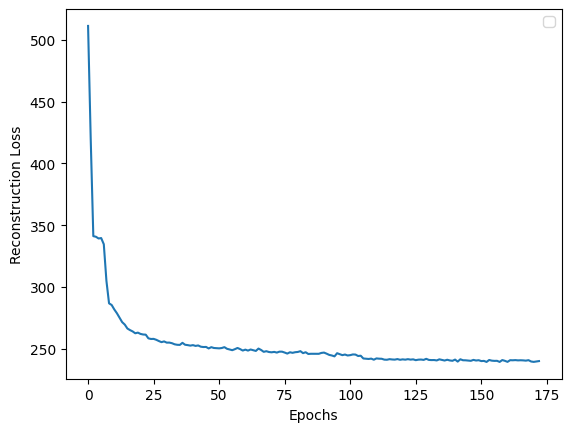

In [72]:
plt.plot(historyautoencoder.history['reconstruction_loss'])
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.legend()

In [73]:
X_autoencoder=autoencoder.encode(X)
print(X_autoencoder.shape)

(1000, 49)


Number of Gaussians: 1
Number of Gaussians: 2
Number of Gaussians: 3
Number of Gaussians: 4
Number of Gaussians: 5
Number of Gaussians: 6
Number of Gaussians: 7
Number of Gaussians: 8
Number of Gaussians: 9
Number of Gaussians: 10
Number of Gaussians: 11
Number of Gaussians: 12
Number of Gaussians: 13
Number of Gaussians: 14
Number of Gaussians: 15
Number of Gaussians: 16
Number of Gaussians: 17
Number of Gaussians: 18
Number of Gaussians: 19
Number of Gaussians: 20
Number of Gaussians: 21
Number of Gaussians: 22
Number of Gaussians: 23
Number of Gaussians: 24
Number of Gaussians: 25
Number of Gaussians: 26
Number of Gaussians: 27
Number of Gaussians: 28
Number of Gaussians: 29
26


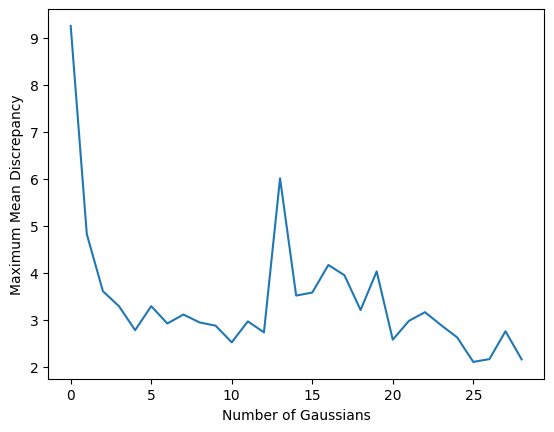

In [74]:
NUM_GAUSSIANS_AUTOENCODER,res_mmd_autoencoder=find_best_GMM_by_MMD(autoencoder,XTEST)
print(NUM_GAUSSIANS_AUTOENCODER)

In [76]:
autoencoder.fitGMM(X,NUM_GAUSSIANS_AUTOENCODER)

GaussianMixture(covariance_type='diag', n_components=26, random_state=0)

Generation of Latent Space (200, 49)
Generated Images (200, 28, 28, 1)


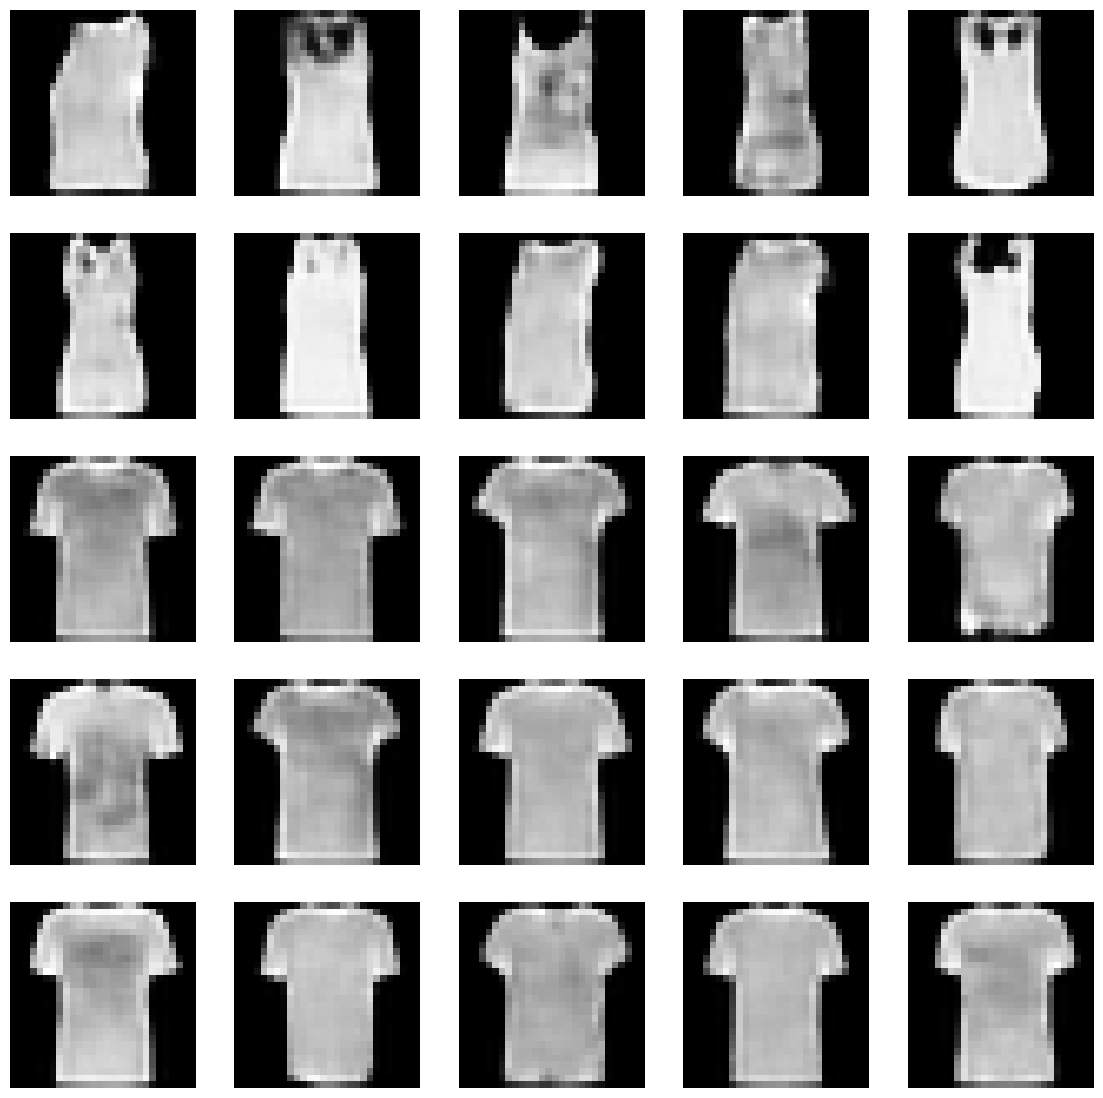

In [77]:
sample_gmm_autoencoder=autoencoder.sampleGMM(NSAMPLES_TEST)[0]
print('Generation of Latent Space',sample_gmm_autoencoder.shape)
generate_sample_autoencoder= autoencoder.decode(sample_gmm_autoencoder)
print('Generated Images',generate_sample_autoencoder.shape)

plt.figure(figsize=[14,14])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(np.reshape(generate_sample_autoencoder[i],[W,H,B]),cmap=CMAP)
    plt.axis('off')
plt.show()

###VAE

In [78]:
variational_encoder= get_model_variational_enconder(input_shape=[W,H,B])
variational_decoder= get_model_variational_decoder()

In [79]:
variational_autoencoder = VAE(variational_encoder, variational_decoder)
variational_autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=.001))
historyvae=variational_autoencoder.fit(X,epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - kl_loss: 8.1624 - loss: 589.8361 - reconstruction_loss: 589.0199
Epoch 2/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - kl_loss: 14.6161 - loss: 341.9540 - reconstruction_loss: 340.4924
Epoch 3/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - kl_loss: 21.0541 - loss: 317.3501 - reconstruction_loss: 315.2447
Epoch 4/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - kl_loss: 32.8675 - loss: 298.1861 - reconstruction_loss: 294.8993
Epoch 5/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - kl_loss: 38.9962 - loss: 284.0412 - reconstruction_loss: 280.1416
Epoch 6/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - kl_loss: 42.9060 - loss: 277.3210 - reconstruction_loss: 273.0304
Epoch 7/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - kl_loss: 47.8108 - loss: 276.7467 - reconstruction_loss: 271.9657
Epoch 8/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - kl_loss: 50.0026 - loss: 268.5548 - reconstruction_loss: 263.5545
Epoch 9/256
32/32 ━━━━━━━━━━━━━

Text(0, 0.5, 'KL Loss')

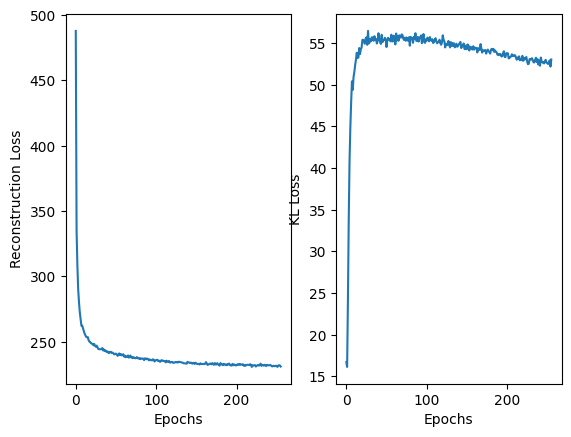

In [80]:
plt.subplot(1,2,1)
plt.plot(historyvae.history['reconstruction_loss'])
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.subplot(1,2,2)
plt.plot(historyvae.history['kl_loss'])
plt.xlabel('Epochs')
plt.ylabel('KL Loss')

Number of Gaussians: 1
Number of Gaussians: 2
Number of Gaussians: 3
Number of Gaussians: 4
Number of Gaussians: 5
Number of Gaussians: 6
Number of Gaussians: 7
Number of Gaussians: 8
Number of Gaussians: 9
Number of Gaussians: 10
Number of Gaussians: 11
Number of Gaussians: 12
Number of Gaussians: 13
Number of Gaussians: 14
Number of Gaussians: 15
Number of Gaussians: 16
Number of Gaussians: 17
Number of Gaussians: 18
Number of Gaussians: 19
Number of Gaussians: 20
Number of Gaussians: 21
Number of Gaussians: 22
Number of Gaussians: 23
Number of Gaussians: 24
Number of Gaussians: 25
Number of Gaussians: 26
Number of Gaussians: 27
Number of Gaussians: 28
Number of Gaussians: 29
6


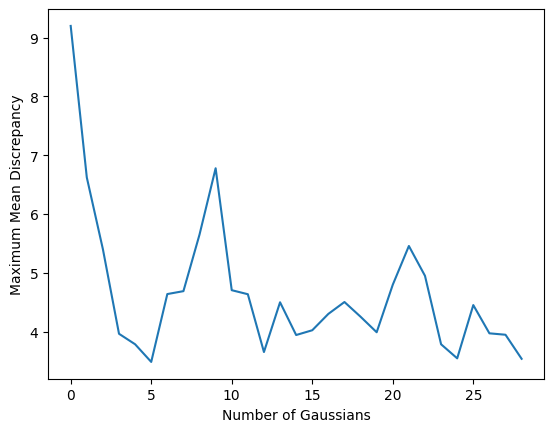

In [81]:
NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER,res_mmd_variational_autoencoder=find_best_GMM_by_MMD(variational_autoencoder,XTEST)
print(NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER)

In [82]:
variational_autoencoder.fitGMM(X,NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER)

GaussianMixture(covariance_type='diag', n_components=6, random_state=0)

In [83]:
mmd_gmm_variational_autoenconder= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_variational_autoencoder,[NSAMPLES_TEST,H*W*B]))


## Results

***************************


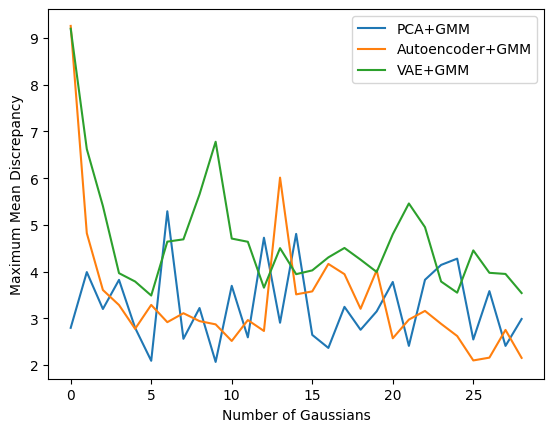

In [84]:
plt.plot(res_mmd_pca,label='PCA+GMM')
plt.plot(res_mmd_autoencoder,label='Autoencoder+GMM')
plt.plot(res_mmd_variational_autoencoder,label='VAE+GMM')
plt.legend()
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()


According to the MMD, the three models seems to have similar perfomance for generatings new samples when the models have to learn one distribution.

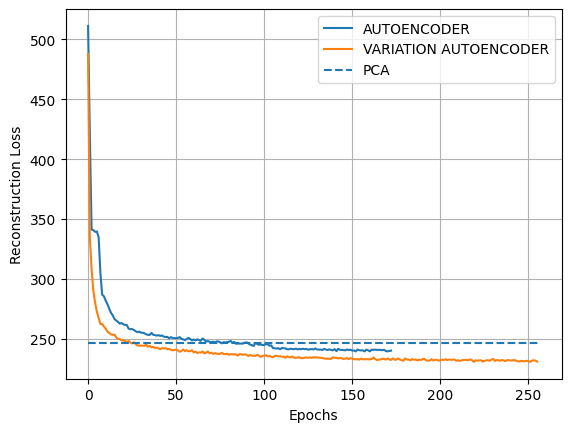

In [85]:
plt.plot(historyautoencoder.history['reconstruction_loss'],label='AUTOENCODER')
plt.plot(historyvae.history['reconstruction_loss'],label='VARIATION AUTOENCODER')
plt.hlines(reconstruction_error_PCA,0,NUM_EPOCHS,linestyles='dashed',label='PCA')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.grid()
plt.legend()

If we use the recontruction error as the metric to identify which algorithm create the best new samples, the VAE seems to outperform the EA and the PCA. Nevertheless, the reconstruction error is bigger for the three algorithm on the Fashion MNSIT than on the MNIST even with multiple classes (2)


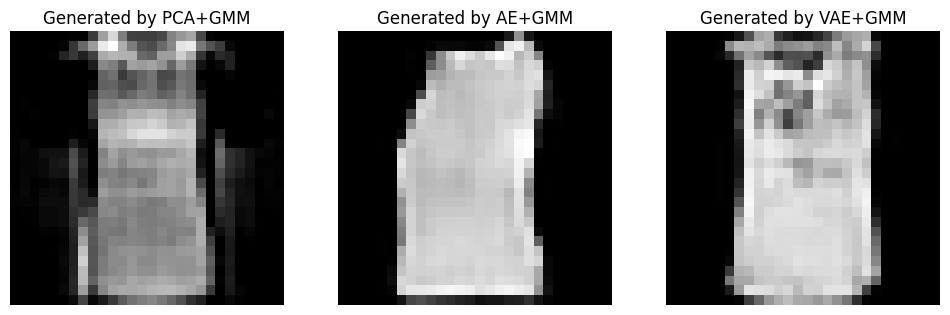

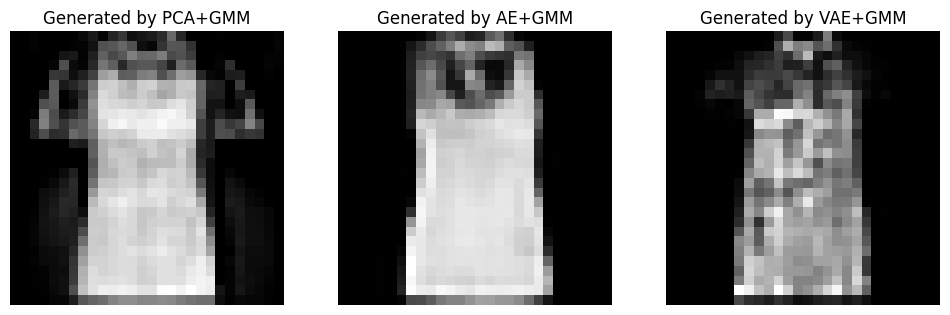

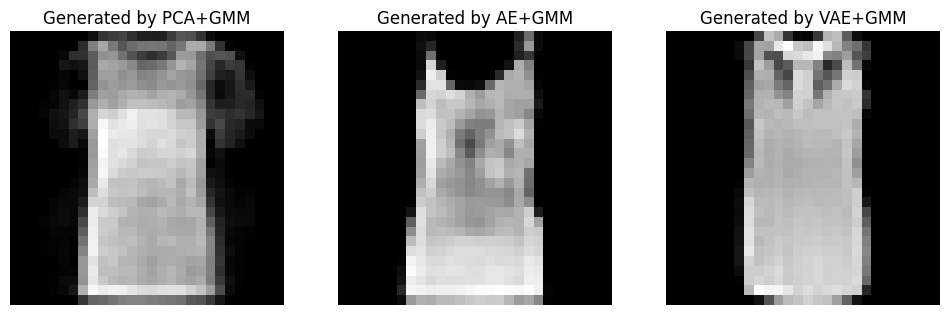

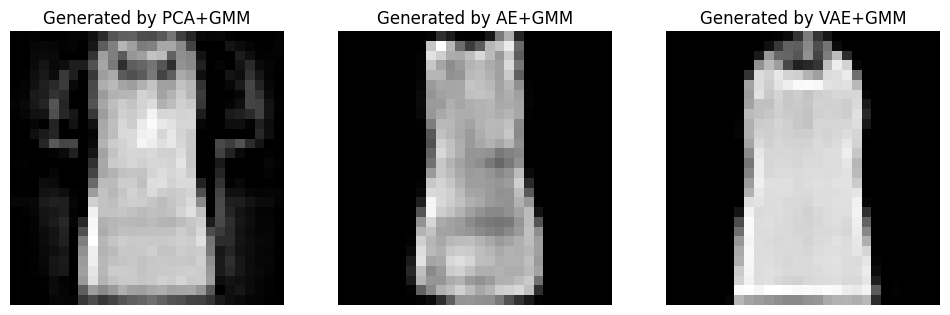

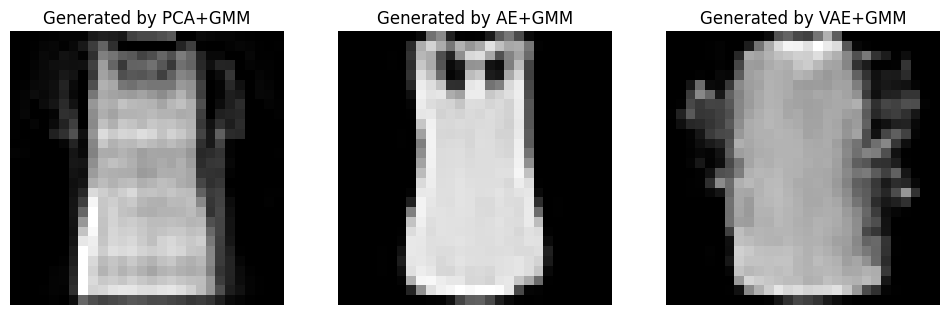

In [87]:
generate_sample_pca=np.reshape(generate_sample_pca,[NSAMPLES_TEST,H,W,B])
sample_gmm_autoencoder=autoencoder.sampleGMM(NSAMPLES_TEST)[0]
generate_sample_autoencoder= autoencoder.decode(sample_gmm_autoencoder)
sample_gmm_variational_autoencoder=variational_autoencoder.sampleGMM(NSAMPLES_TEST)[0]
generate_sample_variational_autoencoder= variational_autoencoder.decode(sample_gmm_variational_autoencoder)
#Just if case for debugging
#print(generate_sample_pca.shape)
#print(generate_sample_autoencoder.shape)
#print(generate_sample_variational_autoencoder.shape)


for i in range(5):
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.clip(generate_sample_pca[i],0.,1.),cmap=CMAP)
    plt.title('Generated by PCA+GMM')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(generate_sample_autoencoder[i],cmap=CMAP)
    plt.title('Generated by AE+GMM')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(generate_sample_variational_autoencoder[i],cmap=CMAP)
    plt.title('Generated by VAE+GMM')
    plt.axis('off')
    plt.show()



Like on MNIST, it seems that, according to vizual appearance, the autoencoder algorithm is the best at creating new samples. The PCA algorithm and the VAE create little artifact and blurry images than are not closed to the samples from the dataset

### Impact of the latent dimension

In [88]:
LATENT_DIM=24

(1000, 784)
(1000, 49)


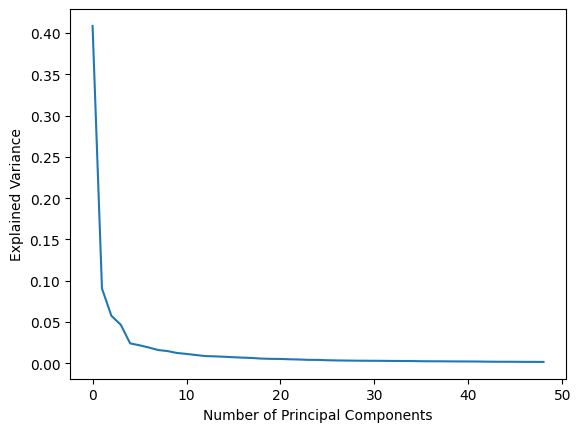

In [91]:
pca = PCA(n_components=DIMENSION_PCA)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
print(X.shape)
print(X_pca.shape)

In [92]:
#Compute the inverse projection from X_pca

X_inverse = pca.inverse_transform(X_pca)


#Compute the reconstruction error

reconstruction_error_PCA=keras.ops.mean(keras.ops.sum(keras.losses.binary_crossentropy(np.reshape(X,[NSAMPLES,H,W,B]),np.reshape(X_inverse,[NSAMPLES,H,W,B])),axis=(1, 2))).numpy()
print(reconstruction_error_PCA)

246.61485221864126


<ipython-input-93-e50ea1a833e2>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx=int(idx)


(-0.5, 27.5, 27.5, -0.5)

<Figure size 1200x1200 with 0 Axes>

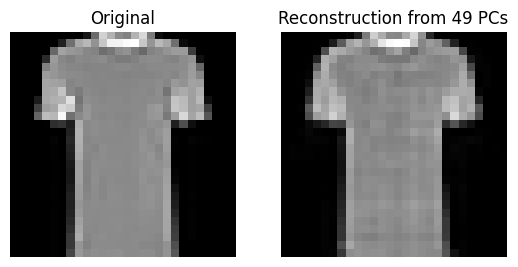

In [93]:
plt.figure(figsize=(12,12))
idx=np.random.rand(1)*NSAMPLES
idx=int(idx)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.reshape(X[idx:(idx+1),:],[W,H,B]),cmap=CMAP)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Reconstruction from '+str(DIMENSION_PCA)+' PCs')
plt.imshow(np.clip(np.reshape(X_inverse[idx:(idx+1),:],[W,H,B]),0.,1.),cmap=CMAP)
plt.axis('off')

Generation from random sampling in GMM
generate_sample_pca (200, 784)


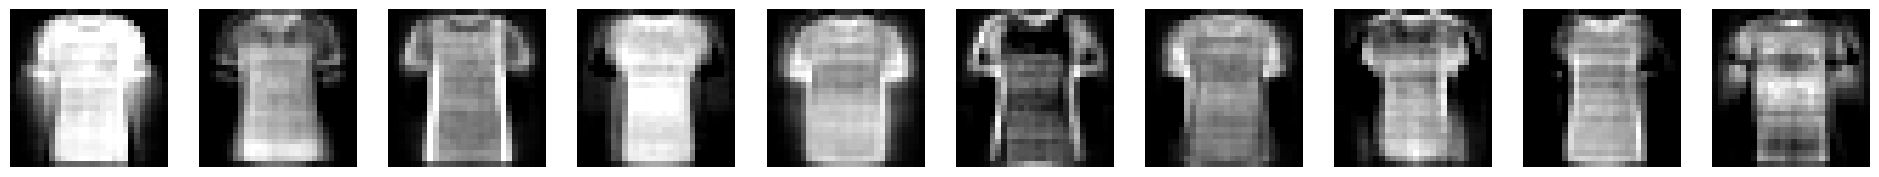

2.7977613621321673


In [94]:
mm_pca = GaussianMixture(n_components=1, covariance_type='diag', random_state=0).fit(X_pca)

print('Generation from random sampling in GMM')
sample = mm_pca.sample(NSAMPLES_TEST)
#sample[0].shape
generate_sample_pca= pca.inverse_transform(sample[0])
print('generate_sample_pca', generate_sample_pca.shape)

plt.figure(figsize=[24,24])
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(np.clip(np.reshape(generate_sample_pca[i,:],[W,H,B]),0,1),cmap=CMAP)
  plt.axis('off')
plt.show()

mmd_pca_GMM_only_one_cluster= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_pca,[NSAMPLES_TEST,H*W*B]))
print(mmd_pca_GMM_only_one_cluster)


In [96]:
MAX_NUMBER_OF_GAUSSIANS=30
res_mmd_pca=[]
for NUMBER_OF_GAUSSIANS in range(1,MAX_NUMBER_OF_GAUSSIANS):
  print('Computing MMD for ',NUMBER_OF_GAUSSIANS,' Gaussians')
  gmm_pca= GaussianMixture(n_components=NUMBER_OF_GAUSSIANS,covariance_type='diag', random_state=0).fit(X_pca)
  sample = gmm_pca.sample(NSAMPLES_TEST)
  generate_sample_pca= pca.inverse_transform(sample[0])
  mmd_pca_GMM= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_pca,[NSAMPLES_TEST,H*W*B]))
  res_mmd_pca.append(mmd_pca_GMM)
  print(mmd_pca_GMM)

Computing MMD for  1  Gaussians
2.7977613621321673
Computing MMD for  2  Gaussians
4.056482248865345
Computing MMD for  3  Gaussians
3.697211286539215
Computing MMD for  4  Gaussians
3.791202373363056
Computing MMD for  5  Gaussians
3.753350486221718
Computing MMD for  6  Gaussians
2.6959744202543767
Computing MMD for  7  Gaussians
3.791731096160822
Computing MMD for  8  Gaussians
4.041305014823804
Computing MMD for  9  Gaussians
4.068587520832168
Computing MMD for  10  Gaussians
2.6844789324786955
Computing MMD for  11  Gaussians
2.8656579412738026
Computing MMD for  12  Gaussians
3.4314475060226446
Computing MMD for  13  Gaussians
3.005305125006963
Computing MMD for  14  Gaussians
2.0096827669455752
Computing MMD for  15  Gaussians
3.2358775662599815
Computing MMD for  16  Gaussians
2.1709623295009806
Computing MMD for  17  Gaussians
3.7871285700503687
Computing MMD for  18  Gaussians
2.033390919143674
Computing MMD for  19  Gaussians
2.425464497387786
Computing MMD for  20  Gaussian

***************************


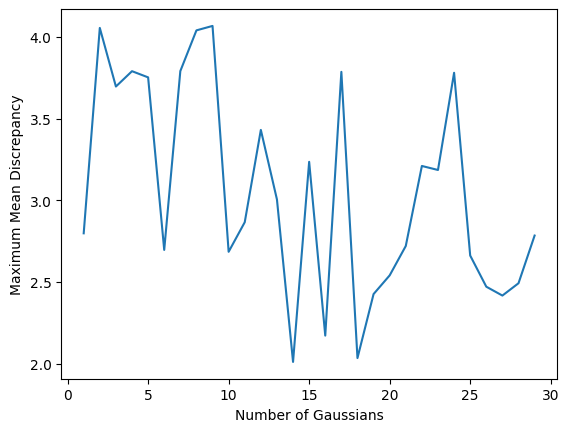

14


In [97]:
plt.figure()
plt.plot(range(1,MAX_NUMBER_OF_GAUSSIANS),res_mmd_pca,label='Diag Conv')
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()

NUM_GAUSSIANS_PCA=np.argmin(res_mmd_pca)+1
print(NUM_GAUSSIANS_PCA)

In [98]:
print('Generation from random sampling in GMM on latent space produced by PCA')
NUMBER_GENERATED_SAMPLES=NSAMPLES
generated_gmm_pca=pca.inverse_transform(gmm_pca.sample(NSAMPLES_TEST)[0])
mmd_gmm_pca= mmd(np.reshape(XTEST,[XTEST.shape[0],W*H*B]), np.reshape(generated_gmm_pca,[NSAMPLES_TEST,W*H*B]))
print('MMD',mmd_gmm_pca)

Generation from random sampling in GMM on latent space produced by PCA
MMD 2.7840041043594166


In [102]:
X=np.reshape(X,[X.shape[0],W,H,B])
print(X.shape)

XTEST=np.reshape(XTEST,[XTEST.shape[0],W,H,B])
print(XTEST.shape)

model_encoder= get_model_enconder(input_shape=[W,H,B])
model_encoder.summary()

model_decoder= get_model_decoder()
model_decoder.summary()

(1000, 28, 28, 1)
(200, 28, 28, 1)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │          75,288 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,104 (367.59 KB)

 Trainable params: 94,104 (367.59 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3136)                │          78,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_12                  │ (None, 14, 14, 64)          │          36,928 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 32)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_12               │ (None, 14, 14, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_12 (ReLU)                      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_13                  │ (None, 28, 28, 32)          │           9,248 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 32)          │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_13               │ (None, 28, 28, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_13 (ReLU)                      │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_14                  │ (None, 28, 28, 16)          │           4,608 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_14               │ (None, 28, 28, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_14 (ReLU)                      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,137 (613.82 KB)

 Trainable params: 157,137 (613.82 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
autoencoder = AE(model_encoder, model_decoder)
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=.01))

CB = [keras.callbacks.EarlyStopping(monitor='total_loss', mode='min',patience=20,restore_best_weights=True),
      keras.callbacks.ReduceLROnPlateau(monitor='total_loss', mode='min', factor=0.1,patience=10, min_lr=0.00001, verbose=1)
     ]
historyautoencoder=autoencoder.fit(X,epochs=NUM_EPOCHS,batch_size=BATCH_SIZE,verbose=2,callbacks=CB)

Epoch 1/256
32/32 - 10s - 321ms/step - reconstruction_loss: 524.6526 - total_loss: 524.6526 - learning_rate: 0.0100
Epoch 2/256
32/32 - 10s - 297ms/step - reconstruction_loss: 482.7158 - total_loss: 482.7158 - learning_rate: 0.0100
Epoch 3/256
32/32 - 8s - 240ms/step - reconstruction_loss: 398.9685 - total_loss: 398.9685 - learning_rate: 0.0100
Epoch 4/256
32/32 - 5s - 157ms/step - reconstruction_loss: 343.4021 - total_loss: 343.4021 - learning_rate: 0.0100
Epoch 5/256
32/32 - 5s - 169ms/step - reconstruction_loss: 339.6693 - total_loss: 339.6693 - learning_rate: 0.0100
Epoch 6/256
32/32 - 5s - 156ms/step - reconstruction_loss: 339.9739 - total_loss: 339.9739 - learning_rate: 0.0100
Epoch 7/256
32/32 - 5s - 143ms/step - reconstruction_loss: 327.6740 - total_loss: 327.6740 - learning_rate: 0.0100
Epoch 8/256
32/32 - 7s - 209ms/step - reconstruction_loss: 312.0945 - total_loss: 312.0945 - learning_rate: 0.0100
Epoch 9/256
32/32 - 9s - 268ms/step - reconstruction_loss: 298.7799 - total_lo

Number of Gaussians: 1
Number of Gaussians: 2
Number of Gaussians: 3
Number of Gaussians: 4
Number of Gaussians: 5
Number of Gaussians: 6
Number of Gaussians: 7
Number of Gaussians: 8
Number of Gaussians: 9
Number of Gaussians: 10
Number of Gaussians: 11
Number of Gaussians: 12
Number of Gaussians: 13
Number of Gaussians: 14
Number of Gaussians: 15
Number of Gaussians: 16
Number of Gaussians: 17
Number of Gaussians: 18
Number of Gaussians: 19
Number of Gaussians: 20
Number of Gaussians: 21
Number of Gaussians: 22
Number of Gaussians: 23
Number of Gaussians: 24
Number of Gaussians: 25
Number of Gaussians: 26
Number of Gaussians: 27
Number of Gaussians: 28
Number of Gaussians: 29
21


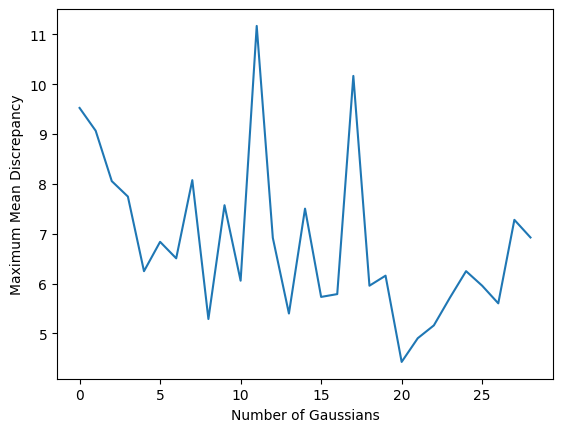

In [104]:
NUM_GAUSSIANS_AUTOENCODER,res_mmd_autoencoder=find_best_GMM_by_MMD(autoencoder,XTEST)
print(NUM_GAUSSIANS_AUTOENCODER)

In [105]:
autoencoder.fitGMM(X,NUM_GAUSSIANS_AUTOENCODER)

GaussianMixture(covariance_type='diag', n_components=21, random_state=0)

In [106]:
sample_gmm_autoencoder=autoencoder.sampleGMM(NSAMPLES_TEST)[0]
print('Generation of Latent Space',sample_gmm_autoencoder.shape)
generate_sample_autoencoder= autoencoder.decode(sample_gmm_autoencoder)
print('Generated Images',generate_sample_autoencoder.shape)

Generation of Latent Space (200, 24)
Generated Images (200, 28, 28, 1)


In [107]:
variational_encoder= get_model_variational_enconder(input_shape=[W,H,B])
variational_decoder= get_model_variational_decoder()

In [108]:
variational_autoencoder = VAE(variational_encoder, variational_decoder)
variational_autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=.001))
historyvae=variational_autoencoder.fit(X,epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - kl_loss: 8.9414 - loss: 477.8167 - reconstruction_loss: 476.9226
Epoch 2/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - kl_loss: 18.9905 - loss: 321.6411 - reconstruction_loss: 319.7420
Epoch 3/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - kl_loss: 25.7964 - loss: 298.8113 - reconstruction_loss: 296.2317
Epoch 4/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - kl_loss: 35.4292 - loss: 286.0160 - reconstruction_loss: 282.4731
Epoch 5/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - kl_loss: 40.1911 - loss: 276.1396 - reconstruction_loss: 272.1205
Epoch 6/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - kl_loss: 44.0262 - loss: 271.7014 - reconstruction_loss: 267.2988
Epoch 7/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - kl_loss: 43.8661 - loss: 262.7450 - reconstruction_loss: 258.3583
Epoch 8/256
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - kl_loss: 44.0442 - loss: 261.2487 - reconstruction_loss: 256.8443
Epoch 9/256
32/32 ━━━━━━━━━━━━━━

Number of Gaussians: 1
Number of Gaussians: 2
Number of Gaussians: 3
Number of Gaussians: 4
Number of Gaussians: 5
Number of Gaussians: 6
Number of Gaussians: 7
Number of Gaussians: 8
Number of Gaussians: 9
Number of Gaussians: 10
Number of Gaussians: 11
Number of Gaussians: 12
Number of Gaussians: 13
Number of Gaussians: 14
Number of Gaussians: 15
Number of Gaussians: 16
Number of Gaussians: 17
Number of Gaussians: 18
Number of Gaussians: 19
Number of Gaussians: 20
Number of Gaussians: 21
Number of Gaussians: 22
Number of Gaussians: 23
Number of Gaussians: 24
Number of Gaussians: 25
Number of Gaussians: 26
Number of Gaussians: 27
Number of Gaussians: 28
Number of Gaussians: 29
28


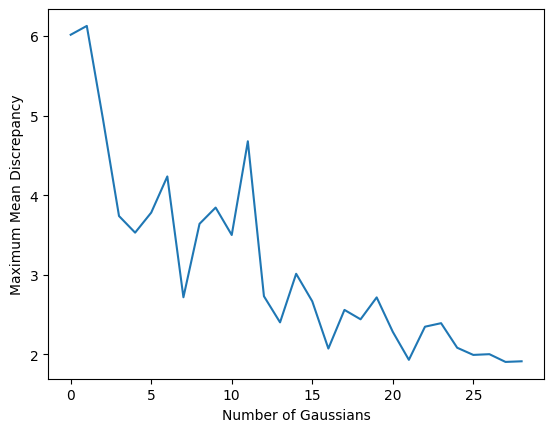

In [109]:
NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER,res_mmd_variational_autoencoder=find_best_GMM_by_MMD(variational_autoencoder,XTEST)
print(NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER)

In [110]:
variational_autoencoder.fitGMM(X,NUM_GAUSSIANS_VARIATIONAL_AUTOENCODER)

GaussianMixture(covariance_type='diag', n_components=28, random_state=0)

In [111]:
mmd_gmm_variational_autoenconder= mmd(np.reshape(XTEST,[NSAMPLES_TEST,H*W*B]), np.reshape(generate_sample_variational_autoencoder,[NSAMPLES_TEST,H*W*B]))


***************************


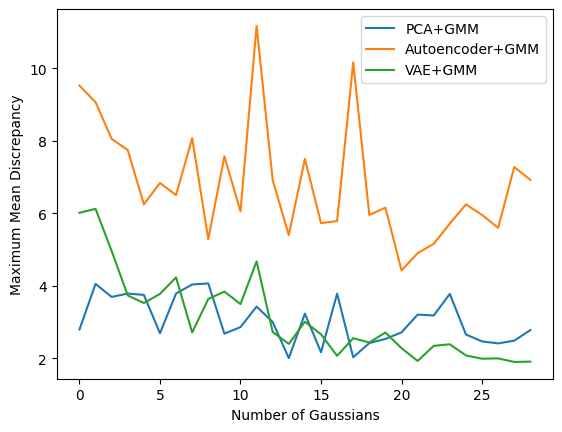

In [112]:
plt.plot(res_mmd_pca,label='PCA+GMM')
plt.plot(res_mmd_autoencoder,label='Autoencoder+GMM')
plt.plot(res_mmd_variational_autoencoder,label='VAE+GMM')
plt.legend()
plt.xlabel('Number of Gaussians')
plt.ylabel('Maximum Mean Discrepancy')
print('***************************')
plt.show()

With a latent space reduced to half its size, the autoencoder demonstrates lower accuracy in generating samples, as measured by the MMD, compared to the PCA and the VAE.

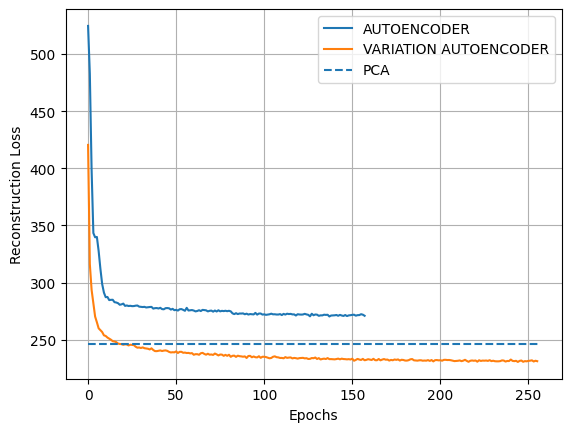

In [113]:
plt.plot(historyautoencoder.history['reconstruction_loss'],label='AUTOENCODER')
plt.plot(historyvae.history['reconstruction_loss'],label='VARIATION AUTOENCODER')
plt.hlines(reconstruction_error_PCA,0,NUM_EPOCHS,linestyles='dashed',label='PCA')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.grid()
plt.legend()

Based on the reconstruction error, the VAE performs best at reconstructing samples. In contrast, the autoencoder is less effective than the PCA when the latent space is smaller.

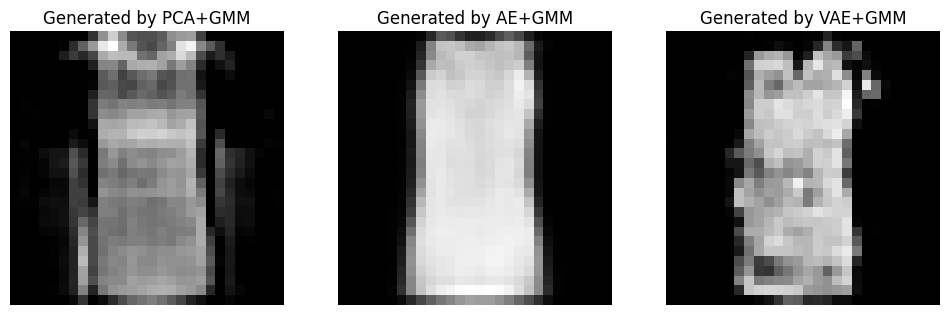

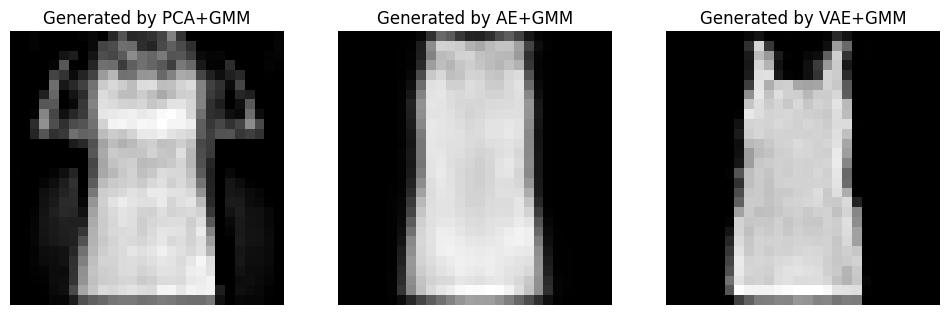

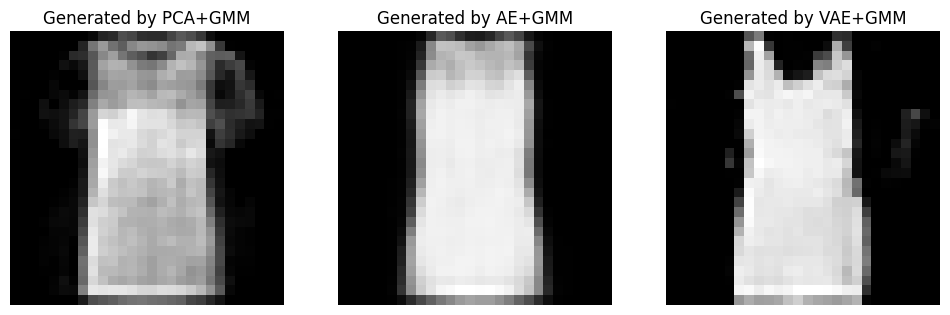

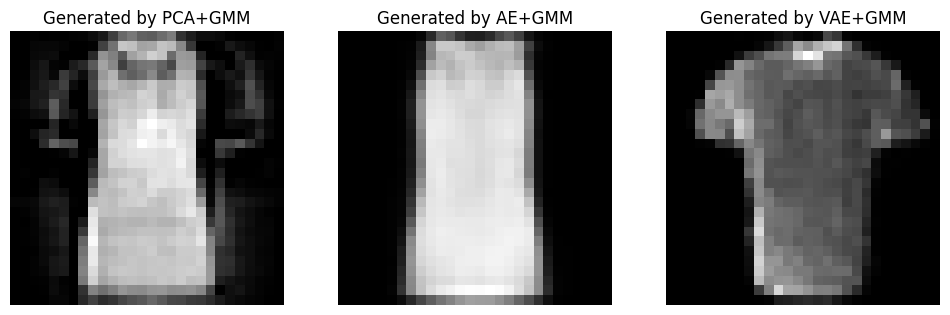

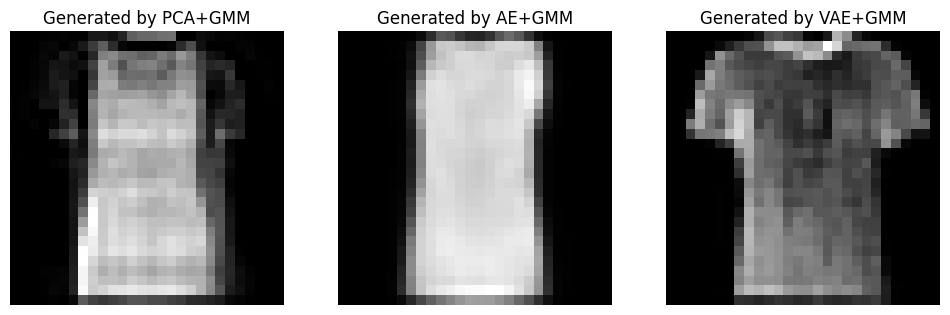

In [114]:
generate_sample_pca=np.reshape(generate_sample_pca,[NSAMPLES_TEST,H,W,B])
sample_gmm_autoencoder=autoencoder.sampleGMM(NSAMPLES_TEST)[0]
generate_sample_autoencoder= autoencoder.decode(sample_gmm_autoencoder)
sample_gmm_variational_autoencoder=variational_autoencoder.sampleGMM(NSAMPLES_TEST)[0]
generate_sample_variational_autoencoder= variational_autoencoder.decode(sample_gmm_variational_autoencoder)
#Just if case for debugging
#print(generate_sample_pca.shape)
#print(generate_sample_autoencoder.shape)
#print(generate_sample_variational_autoencoder.shape)


for i in range(5):
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.clip(generate_sample_pca[i],0.,1.),cmap=CMAP)
    plt.title('Generated by PCA+GMM')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(generate_sample_autoencoder[i],cmap=CMAP)
    plt.title('Generated by AE+GMM')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(generate_sample_variational_autoencoder[i],cmap=CMAP)
    plt.title('Generated by VAE+GMM')
    plt.axis('off')
    plt.show()


From a visual interpretation of the results, the VAE appears to deliver the best outcomes, producing coherent and recognizable images. In contrast, the AE generates images without any discernible shape, while the PCA produces blurry images with visible but not well-defined sleeve-like artifacts.



While the AE excelled at generating samples based on our tree criterion when the latent space dimension was
d=49, it became the worst-performing algorithm as
d decreased. In contrast, the VAE maintained its effectiveness at generating new samples, performing equally well in lower-dimensional latent spaces as in higher-dimensional ones.